<a href="https://colab.research.google.com/github/Gitstrong3333/MachineLearning_Projects2025_2026/blob/main/Bank_Loan_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**


**Context**
---



AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

**Data Dictionary**

ID: Customer ID

Age: Customer’s age in completed years

Experience: #years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage: Value of house mortgage if any. (in thousand dollars)

Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)

Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)

Online: Do customers use internet banking facilities? (0: No, 1: Yes)

CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)







**Importing necessary libraries**

In [ ]:
%pip install scikit-learn

In [ ]:
# 1. Reinstall fresh copy of scikit-plot
!pip install --force-reinstall scikit-plot

# 2. Patch all scikitplot files that import scipy.interp
import fileinput, glob

for filepath in glob.glob("/usr/local/lib/python3.12/dist-packages/scikitplot/*.py"):
    with fileinput.FileInput(filepath, inplace=True) as file:
        for line in file:
            if "from scipy import interp" in line:
                print("from numpy import interp")
            else:
                print(line, end="")

# 3. Test import
import scikitplot as skplt
print("✅ scikitplot patched across all files and ready to use!")

  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.4-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cach

✅ scikitplot patched across all files and ready to use!


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import os
import statsmodels.api as sm
import scipy.stats as stats
import copy
import pandas.core.algorithms as algos
from pandas import Series
import re
import traceback
import string
import scikitplot as skplt
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.model_selection import FeatureImportances

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Loan_Modelling.csv'  # adjust if it's in a subfolder
Loan = pd.read_csv(file_path)

pd.read_csv() is the pandas function used to read CSV files.

"Loan_Modelling.csv" is the name of the file uploaded.

The resulting DataFrame (Loan) will now contain all the data from that CSV file.

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

**Data Overview**

In [ ]:
# View the first and last 5 rows of the dataset
data.head()      ##  View top 5 rows of the data



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


.head() displays the first 5 rows of a DataFrame by default.

You can also specify a number, for example data.head(10) to see the first 10 rows.

In [ ]:
data.tail()# Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Observation: .tail() displays the last 5 rows of a DataFrame by default.

You can also specify a number, for example data.tail(10) to see the last 10 rows.

**Understand the shape of the dataset**

In [ ]:
data.shape

(5000, 14)

.shape gives the number of rows and columns in the data. Loan_Modelling.csv file contains 5000 rows and 14 columns.

**Check the data types of the columns for the dataset**

In [ ]:
data.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


.dtypes → shows the data type of each column (like int64, float64, or object)

**Checking the Statistical Summary**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The dataset has 5000 records and 14 features.

Experience includes negative values, which may be data errors.

Income varies widely (mean ≈ 74, max = 224).

Around 9.6% of applicants have taken a personal loan (Personal_Loan = 1).

Online usage is high (~60%), and CreditCard usage is ~29%.

Dropping columns

In [ ]:
Loan = Loan.drop(['ID'], axis=1)

['ID'] → specifies the column name(s) to drop

axis=1 → means you’re removing a column (not a row)

The result is reassigned back to Loan to update the DataFrame

Data Preprocessing

Checking for Anomalous Values

Check unique values in Experience

In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

This line helps you inspect if there are negative or unrealistic experience values (e.g., -1, -2, -3), which don’t make sense in years of experience.

**Identify records with negative experience**

In [ ]:
data[data["Experience"] < 0]["Experience"].unique()


array([-1, -2, -3])

This filters and lists all unique negative values found in the column — typically data entry or encoding errors.

**Correct the anomalies**

In [ ]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

replace invalid negative values with their positive equivalents, assuming the negative sign was entered mistakenly.

Check unique values in Education

In [ ]:
data["Education"].unique()


array([1, 2, 3])

Education Column Analysis:

Unique values: [1, 2, 3]
 Observation:

The Education column appears to be numerically encoded with three distinct categories (1, 2, and 3). We may need to map these numeric values to descriptive categories (e.g., “Graduate,” “Not Graduate,” “Professional”) during later preprocessing for interpretability.

correction more scalable and cleaner with one line:

In [ ]:
# Automatically fix all negative experience values
data["Experience"] = data["Experience"].abs()


**Check if correction worked**

In [ ]:
data["Experience"].unique()


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

Experience Column Analysis:

Before correction: The Experience column contained both positive and negative values, including -1, -2, and -3, which are invalid for years of experience.

Anomalous values identified: [-1, -2, -3].

After correction: All negative experience values were replaced with their positive counterparts.

Final unique experience values: Range from 0 to 43 years, with no negative entries remaining.

Observation:

The dataset initially had a few negative experience values likely caused by data entry errors. These have been corrected to positive values to ensure logical consistency.

In [ ]:
# Check how many unique ZIP codes are present
num_unique_zip = data["ZIPCode"].nunique()
print("Number of unique ZIP codes:", num_unique_zip)

# Display the first 10 unique ZIP codes
print("\nSample unique ZIP codes:", data["ZIPCode"].unique()[:10])

# Optional: Frequency distribution of ZIP codes
zip_distribution = data["ZIPCode"].value_counts().head(10)
print("\nTop 10 most frequent ZIP codes:\n", zip_distribution)


Number of unique ZIP codes: 467

Sample unique ZIP codes: [91107 90089 94720 94112 91330 92121 91711 93943 93023 94710]

Top 10 most frequent ZIP codes:
 ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
Name: count, dtype: int64


nunique() → gives the count of distinct ZIP codes.

unique() → shows which ZIP codes exist.

value_counts() → helps check how frequently each ZIP code appears, which is useful for detecting skewness or dominance in one region.

**Simplifying ZIP Code into Regions**

In [ ]:
# Convert ZIPCode column to string to allow slicing operations
data["ZIPCode"] = data["ZIPCode"].astype(str)

# Check how many unique regions exist if we consider only the first two digits of ZIPCode
unique_zip_prefixes = data["ZIPCode"].str[:2].nunique()
print("Number of unique ZIP code prefixes (first 2 digits):", unique_zip_prefixes)

# Replace the original ZIPCode with its first two digits to represent regional grouping
data["ZIPCode"] = data["ZIPCode"].str[:2]

# Convert the simplified ZIPCode column to categorical type for modeling efficiency
data["ZIPCode"] = data["ZIPCode"].astype("category")

# Optional: check the final result
print("Sample ZIP code categories:", data["ZIPCode"].unique()[:10])


Number of unique ZIP code prefixes (first 2 digits): 7
Sample ZIP code categories: ['91', '90', '94', '92', '93', '95', '96']
Categories (7, object): ['90', '91', '92', '93', '94', '95', '96']


-astype(str) → ensures ZIP codes are treated as text, not numbers (important to preserve leading zeros).

-str[:2] → extracts only the first two digits to group ZIP codes into regional clusters (for example, 60xxx → “60”).

-astype("category") → reduces memory usage and prepares it for machine-learning encoding later

In [ ]:
# List of categorical columns including the target variable 'Personal Loan'
categorical_cols = [
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
    "Personal_Loan"
]

# Convert each categorical column to 'category' data type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Confirm conversion
print("✅ Data types after conversion:\n")
print(data[categorical_cols].dtypes)


✅ Data types after conversion:

Family                category
Education             category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
ZIPCode               category
Personal_Loan         category
dtype: object


Each column represents discrete categories (e.g., “Yes/No” or class levels).

astype('category') saves memory and signals that these are non-numeric features for modeling.

Including Personal Loan ensures that the target variable is correctly recognized as categorical (important for classification tasks).

**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Draws a combined boxplot (top) and histogram (bottom) for a given feature.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing the feature.
    feature : str
        The name of the column to visualize.
    figsize : tuple, optional
        Size of the figure. Default is (12, 7).
    kde : bool, optional
        Whether to overlay a kernel density curve on the histogram. Default is False.
    bins : int, optional
        Number of bins for the histogram. Default is None (auto).
    """

    # Create a figure with 2 vertically stacked subplots (boxplot + histogram)
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box,
        showmeans=True,
        color="violet"
    )
    ax_box.set(title=f"Distribution of {feature}")

    # Histogram
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist,
        bins=bins,
        color="skyblue"
    )

    # Add mean and median lines to histogram
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    # Add legend and titles
    ax_hist.legend()
    ax_hist.set(title=f"Histogram and Boxplot of {feature}")

    plt.tight_layout()
    plt.show()


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Draws a labeled barplot for a categorical feature.

    Parameters
    ----------
    data : pandas.DataFrame
        The dataset containing the feature.
    feature : str
        The categorical column name to visualize.
    perc : bool, optional
        If True, display percentages instead of raw counts. Default is False.
    n : int, optional
        Show only the top 'n' most frequent categories. Default shows all.
    """

    # --- Compute counts and figure dimensions ---
    total = len(data[feature])
    num_unique = data[feature].nunique()
    width = (n if n is not None else num_unique) + 1
    plt.figure(figsize=(width, 5))

    # --- Determine order of bars ---
    order = data[feature].value_counts().index[:n]

    # --- Create barplot ---
    ax = sns.countplot(
        data=data,
        x=feature,
        order=order,
        palette="Paired"
    )

    # --- Style and title ---
    plt.xticks(rotation=90, fontsize=12)
    plt.title(f"Distribution of {feature}", fontsize=14, fontweight="bold")

    # --- Annotate each bar with count or percentage ---
    for p in ax.patches:
        count = p.get_height()
        label = f"{(count / total) * 100:.1f}%" if perc else f"{count:,}"

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="bottom",
            fontsize=11,
            xytext=(0, 5),
            textcoords="offset points"
        )

    # --- Final layout ---
    plt.tight_layout()
    plt.show()


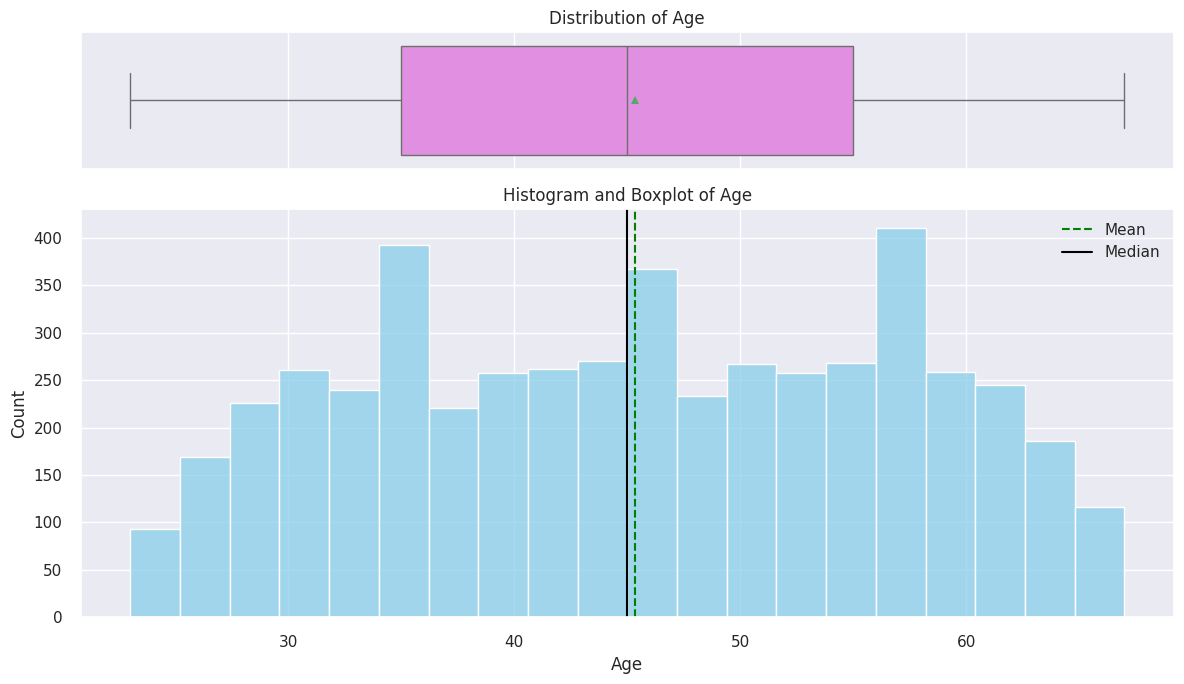

In [ ]:
histogram_boxplot(data, "Age", bins=20)

The histogram shows that most applicants are between 35 and 55 years old, with the distribution slightly right-skewed (more younger applicants). The boxplot indicates few outliers on the higher side (above ~65 years), while the mean (green dashed line) and median (black solid line) are close — suggesting the data is fairly symmetrical overall.

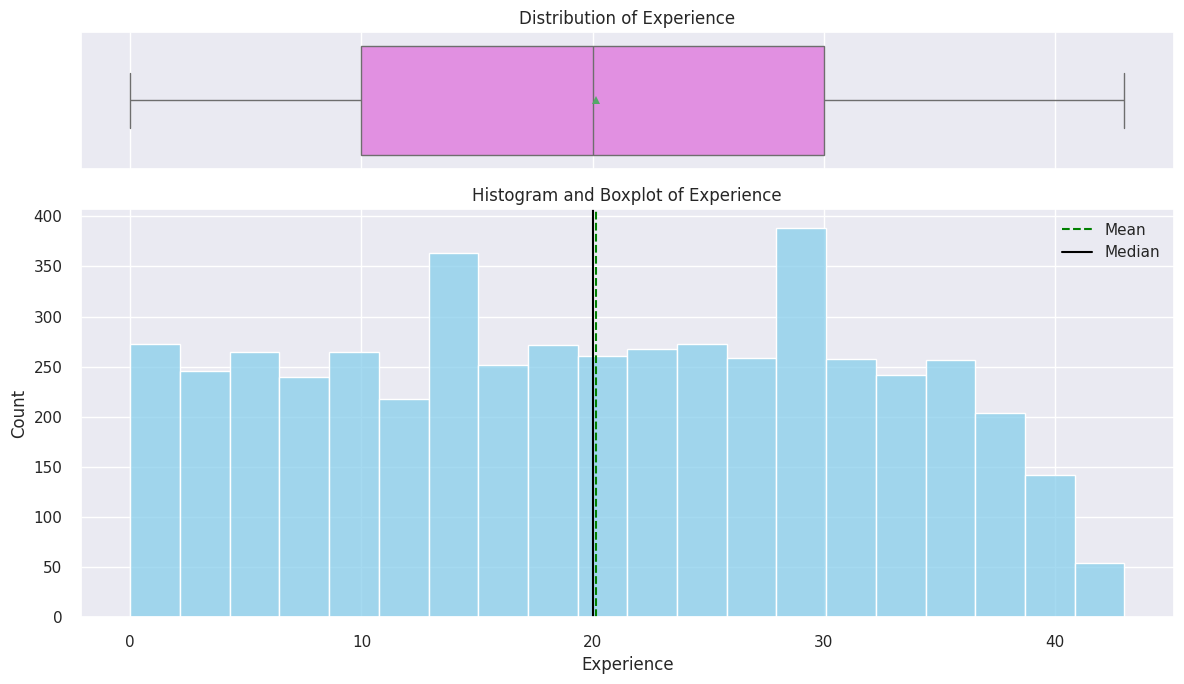

In [ ]:
# Observations on Experience
histogram_boxplot(data, "Experience",bins=20)


Observation for Experience column: The histogram shows that most applicants have 10 to 30 years of experience, with the distribution being roughly bell-shaped but slightly left-skewed (a few values closer to zero). The boxplot confirms that there are no significant outliers after correction of negative values, and the mean (green dashed line) and median (black line) are very close — indicating a relatively symmetrical distribution of experience among applicants.

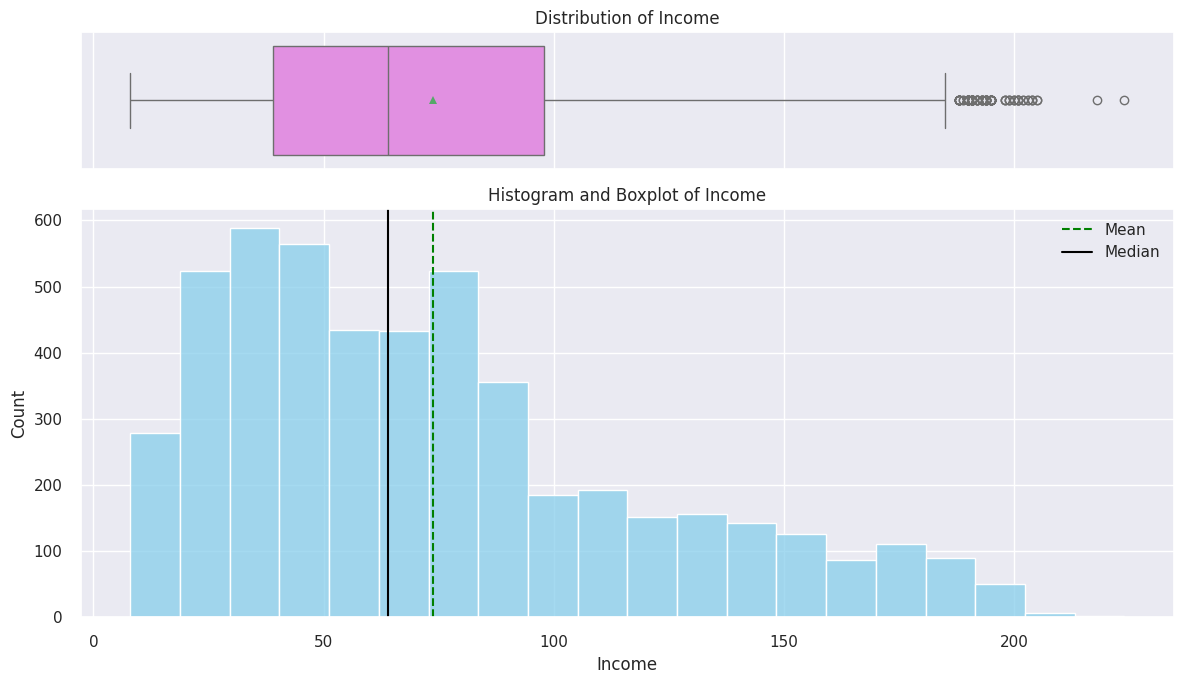

In [ ]:
histogram_boxplot(data, "Income",bins=20)

Observation for Income column: The histogram shows that most applicants have an income between 20 and 100 (in thousands), with a few earning much higher amounts, creating a right-skewed distribution. The boxplot clearly indicates several high-income outliers beyond 150, suggesting a small group of very high earners. The mean (green dashed line) is slightly higher than the median (black line), confirming the positive skewness due to these outliers

**Observations on CCAvg**

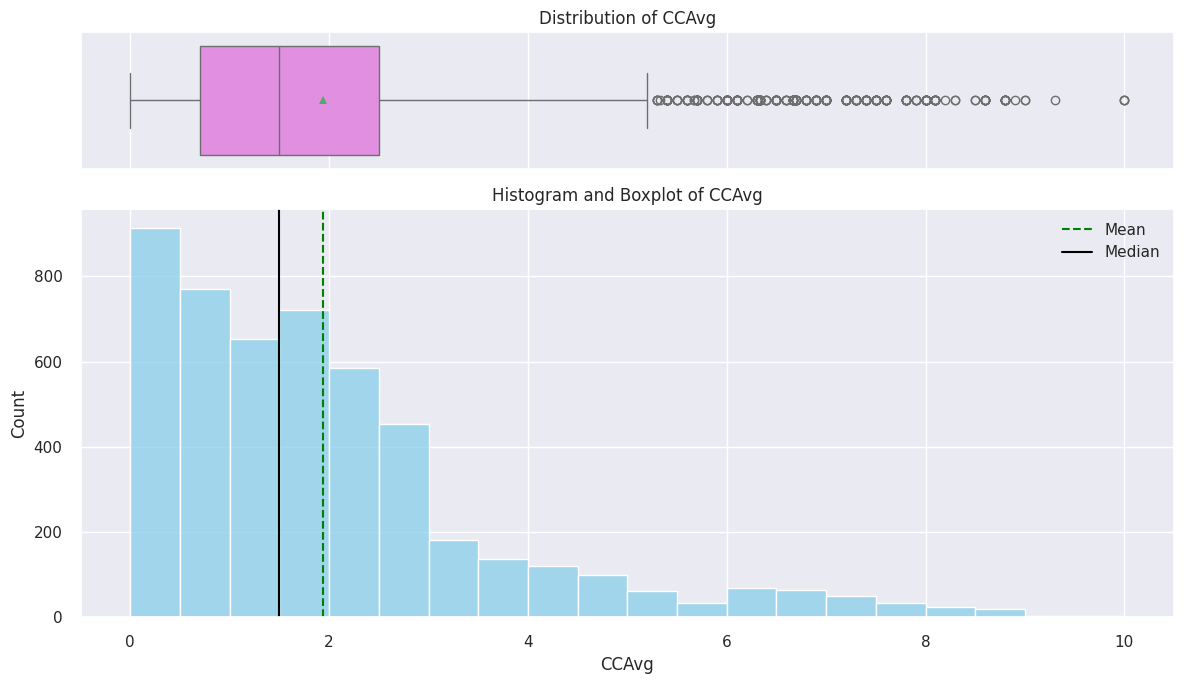

In [ ]:
histogram_boxplot(data, "CCAvg",bins=20)

Observation for CCAvg column: The histogram shows that most customers have an average monthly credit card spending below 3, indicating lower usage. The distribution is highly right-skewed, with a few customers spending up to 10, which appear as outliers in the boxplot. The mean (green dashed line) lies to the right of the median (black line), confirming the positive skewness caused by these high-spending customers.

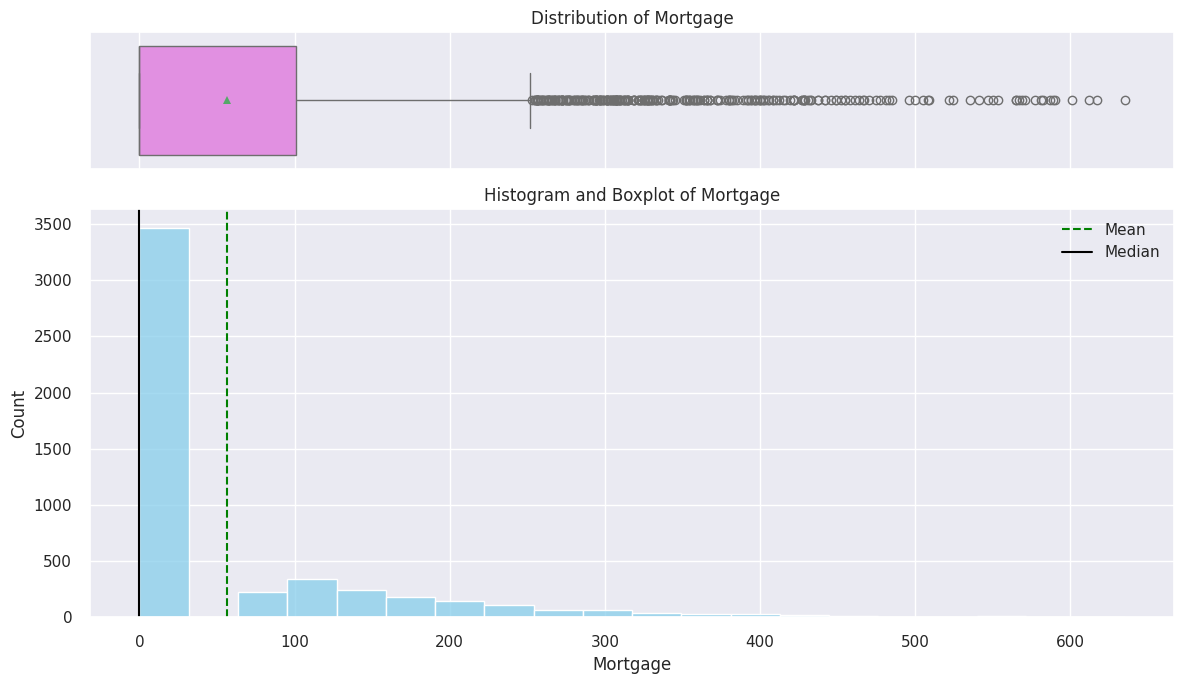

In [ ]:
histogram_boxplot(data, "Mortgage",bins=20)

Observation: The histogram shows that the majority of customers have no mortgage (0 value), while a smaller group has mortgages up to 600, creating a highly right-skewed distribution. The boxplot reveals several extreme outliers on the higher side, and the mean (green dashed line) lies well above the median (black line), confirming the presence of a few high-mortgage customers skewing the data.

**Observations on Family**

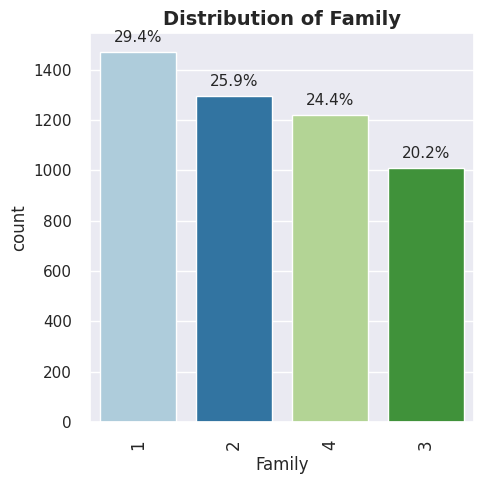

In [ ]:
labeled_barplot(data, "Family", perc=True)

Observation for Family column: The barplot shows that most applicants belong to family sizes of 1 or 2, together representing the majority of the dataset. As family size increases to 3 and 4, the percentage of applicants decreases noticeably, indicating that smaller families are more common among loan applicants in this dataset

**Observations on Education**

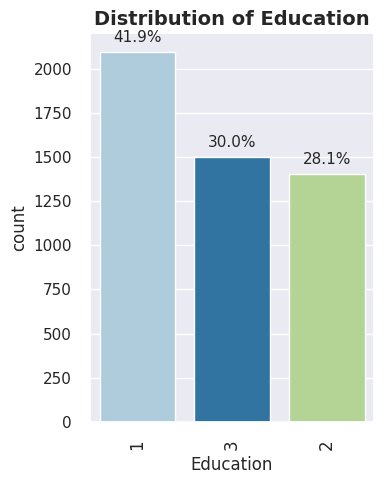

In [ ]:
labeled_barplot(data, "Education", perc=True)

Observation: The barplot shows that:

Education = 1 (Undergraduate) → ~42%, the highest proportion of applicants.

Education = 2 (Graduate) → around 28% of applicants.

Education = 3 (Advanced/Professional) → roughly 30% of applicants.

Observations on Securities_Account

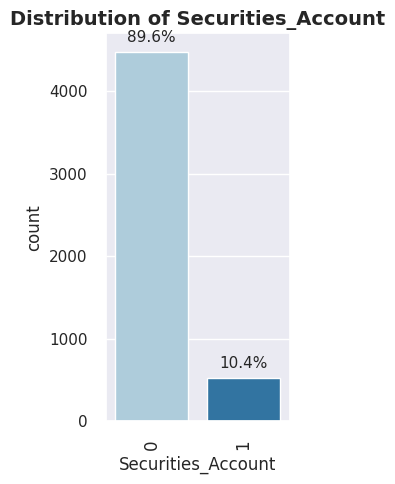

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)

The barplot shows that the majority of applicants — around 89.6% — do not have a securities account (value = 0), while only about 10.4% do have one (value = 1). This indicates that most customers applying for loans do not maintain investments in securities, highlighting that securities account ownership is relatively rare among loan applicants.

**Observations on CD_Account**

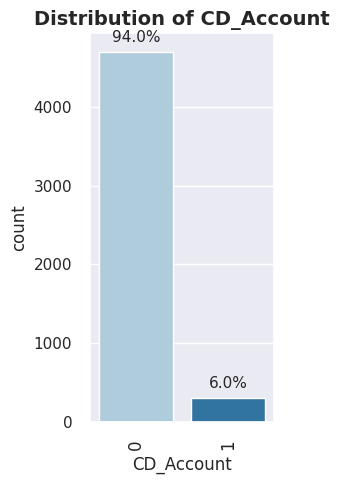

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)

Observation: The barplot shows that approximately 94% of applicants do not have a Certificate of Deposit (CD) account (value = 0), while only about 6% have one (value = 1). This indicates that CD account ownership is quite uncommon among loan applicants, suggesting that most customers prefer to keep their funds in regular savings or checking accounts rather than fixed deposits.

**Observations on Online**

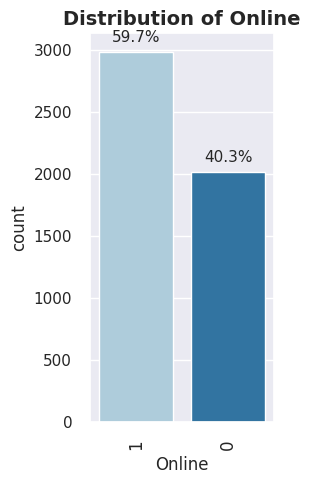

In [ ]:
labeled_barplot(data, "Online", perc=True)

Observation: The barplot shows that about 59.7% of customers use online banking services (Online = 1), while around 40.3% do not (Online = 0). This indicates that a majority of loan applicants prefer using online banking, showing a strong adoption of digital banking platforms among customers in this dataset.

**Observation on CreditCard**

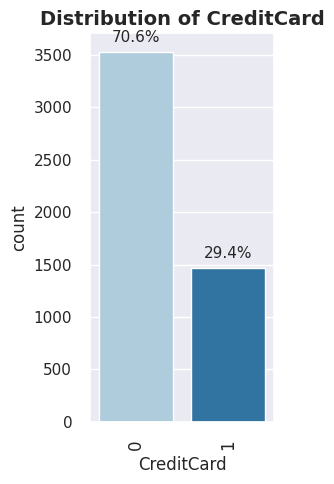

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)

Observation: The barplot shows that about 70.6% of applicants do not have a credit card issued by the bank (CreditCard = 0), while around 29.4% do have one (CreditCard = 1). This indicates that most loan applicants are not existing credit card customers of the bank, suggesting an opportunity for the bank to cross-sell credit card products to its loan applicants.

**Observation on ZIPCode**

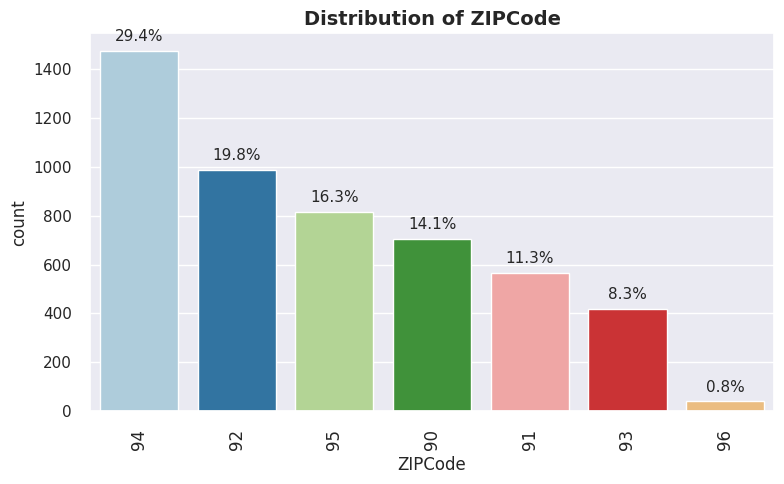

In [ ]:
labeled_barplot(data, "ZIPCode", perc=True)

The barplot shows that customers are distributed across 7 ZIP code regions (90–96), with notable differences in representation:

ZIP code 94 has the highest proportion (29.4%) of loan applicants, followed by ZIP codes 92 (19.8%) and 95 (16.3%).

ZIP codes 90 (14.1%) and 91 (11.3%) contribute moderately, while 93 (8.3%) and 96 (0.8%) have fewer applicants.

 Interpretation: The majority of customers come from ZIP code 94, indicating that this region is the most active loan application area, whereas ZIP code 96 shows minimal participation. This suggests a potential geographic concentration of customers around specific regions.

**Bivariate Analysis**

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Number of unique categories in predictor
    count = data[predictor].nunique()

    # Identify the least frequent target category for sorting
    sorter = data[target].value_counts().index[-1]

    # Frequency table
    tab1 = (
        pd.crosstab(data[predictor], data[target], margins=True)
        .sort_values(by=sorter, ascending=False)
    )
    print(tab1)
    print("-" * 120)

    # Normalized table (row percentages)
    tab = (
        pd.crosstab(data[predictor], data[target], normalize="index")
        .sort_values(by=sorter, ascending=False)
    )

    # Plot stacked bar chart
    tab.plot(
        kind="bar",
        stacked=True,
        figsize=(count + 5, 5)
    )

    # Legend placement
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


This function creates a stacked bar chart to compare how different categories of a predictor variable are distributed across the classes of a target variable, providing both counts and proportions for better understanding of their relationship.

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot distributions and boxplots of a predictor variable with respect to a binary target variable
    """

    # Create a 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    # Distribution plot for first target class
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density"
    )

    # Distribution plot for second target class
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="green",
        stat="density"
    )

    # Boxplot including outliers
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist_rainbow"
    )

    # Boxplot excluding outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow"
    )

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


This function creates two histograms and two boxplots to compare how a numerical feature (predictor) is distributed across different categories of a target variable, helping to visually detect differences or patterns that may influence the target.

how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


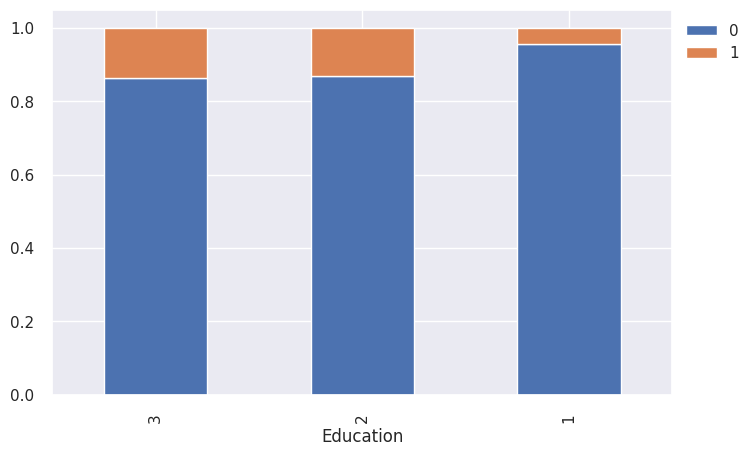

In [ ]:
stacked_barplot(
    data,
    predictor="Education",
    target="Personal_Loan"
)

Observation for Education vs Personal_Loan (based on the graph):

The stacked barplot shows the relationship between education level and whether applicants have taken a personal loan (Personal_Loan).

Each bar represents one education level — 1 = Undergraduate, 2 = Graduate, and 3 = Advanced/Professional.

The teal portion (0) represents applicants who did not take a personal loan, while the grey portion (1) represents those who did.

From the graph:

Applicants with advanced or professional education (3) have the largest grey section, meaning more of them have taken personal loans.

Graduates (2) also show a noticeable number of loan takers.

Undergraduates (1) have the smallest grey section, showing that fewer of them have taken loans compared to the other two groups.

 Interpretation: As the education level increases, the likelihood of taking a personal loan also increases — suggesting that more educated individuals may have greater financial awareness, higher incomes, or more access to credit.

**Personal_Loan vs Family**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


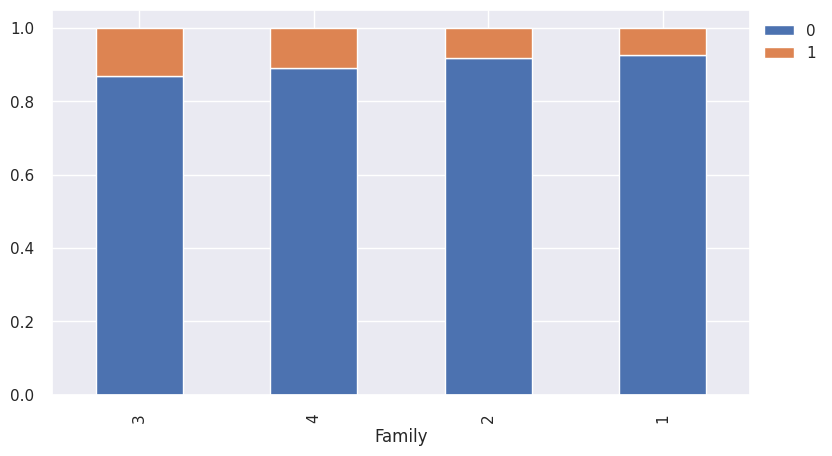

In [ ]:


stacked_barplot(
    data,
    predictor="Family",
    target="Personal_Loan"
)

The stacked barplot shows how the family size of customers relates to whether they have taken a personal loan.

Each bar represents a family size (1 to 4).

The blue section (0) shows customers who did not take a personal loan, while the green section (1) represents those who did.

From the graph:

Customers with larger families (3 or 4 members) have a slightly higher proportion of personal loan takers compared to smaller families.

Customers with 1 or 2 family members have a lower proportion of loan approvals.

Interpretation: As family size increases, the likelihood of taking a personal loan slightly rises, possibly because larger families may have greater financial needs or expenses, leading them to seek additional credit support.

Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


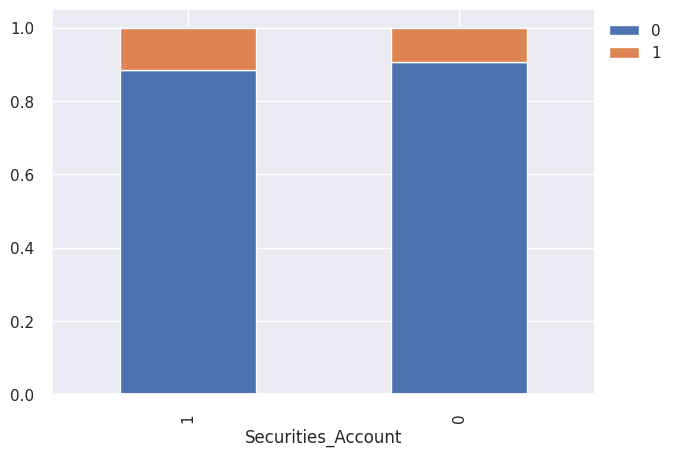

In [ ]:

# Call the stacked_barplot function
stacked_barplot(
    data,
    predictor="Securities_Account",
    target="Personal_Loan"
)

Observation for Securities_Account vs Personal_Loan: The stacked barplot shows how having a Securities Account relates to taking a Personal Loan.

Each bar represents whether the customer has (1) or does not have (0) a securities account.

The blue area (0) represents customers who did not take a loan, while the green area (1) represents those who did.

From the graph:

Customers without a securities account (0) make up the majority of the dataset, and a smaller proportion of them have taken personal loans.

Customers with a securities account (1) show a slightly higher proportion of personal loan takers compared to those without one.

Interpretation: Having a securities account appears to be slightly associated with taking a personal loan, possibly because such customers are generally more financially active or credit-qualified. However, the difference is not very large, indicating only a mild relationship.

**Personal_Loan vs CD_Account**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


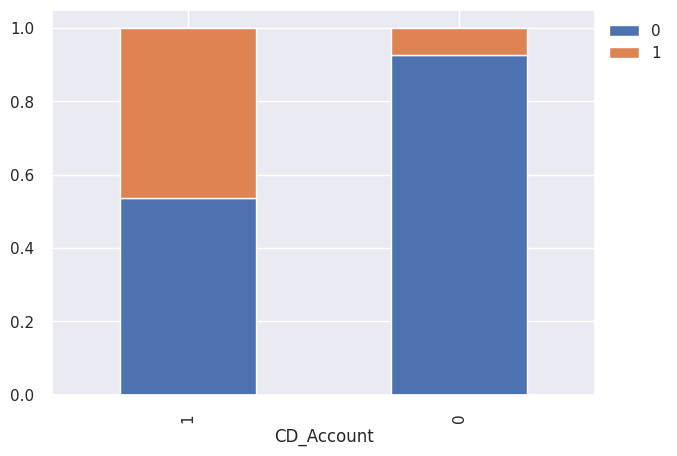

In [ ]:

# Call the stacked_barplot function
stacked_barplot(
    data,
    predictor="CD_Account",
    target="Personal_Loan"
)

Observation for CD_Account vs Personal_Loan: The stacked barplot illustrates how having a Certificate of Deposit (CD) Account relates to taking a Personal Loan.

Each bar represents whether a customer has (1) or does not have (0) a CD account.

The blue section (0) shows customers who did not take a loan, while the green section (1) represents those who did.

From the graph:

Customers without a CD account (0) make up the majority, and only a small proportion of them have taken personal loans.

Customers with a CD account (1) have a much larger green section, showing that a significantly higher proportion of them have taken personal loans.

Interpretation: Having a CD account is strongly associated with a higher likelihood of taking a personal loan. This suggests that customers who already hold fixed deposits are more financially stable and trusted by the bank, making them more likely to be approved for loans.

**Personal_Loan vs Online**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


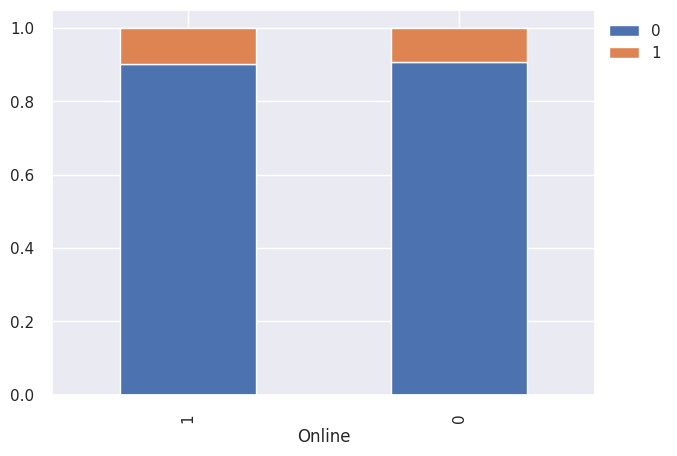

In [ ]:

# Call the stacked_barplot function
stacked_barplot(
    data,
    predictor="Online",
    target="Personal_Loan"
)

Observation for Online vs Personal_Loan: The stacked barplot shows the relationship between online banking usage and personal loan status.

Each bar represents whether the customer uses online banking (1) or does not (0).

The blue section (0) shows customers who did not take a personal loan, while the green section (1) represents those who did.

From the graph:

Both groups — online users (1) and non-users (0) — show a similar proportion of personal loan takers.

The green section is nearly equal in both bars, meaning that online usage has little impact on whether someone took a personal loan.

Interpretation: There is no significant relationship between using online banking and taking a personal loan. Customers who use online services and those who don’t are almost equally likely to apply for loans.

**Personal_Loan vs CreditCard**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


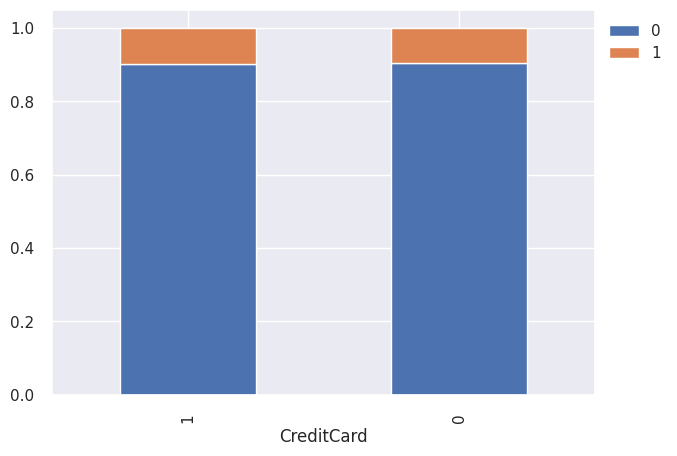

In [ ]:

stacked_barplot(
    data,
    predictor="CreditCard",
    target="Personal_Loan"
)

Observation for CreditCard vs Personal_Loan: The stacked barplot compares customers who have and do not have a credit card issued by the bank with their personal loan status.

Each bar represents whether a customer has (1) or does not have (0) a credit card.

The blue section (0) represents those who did not take a loan, while the green section (1) represents those who did.

From the graph:

Customers with a credit card (1) show a slightly higher proportion of personal loan takers compared to those without one.

However, the majority in both groups did not take a loan, as indicated by the larger blue portions.

Interpretation: Having a credit card is mildly associated with taking a personal loan. This suggests that credit card users may already have an established credit history and could be more open or eligible for personal loans, but the relationship is not very strong.

Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


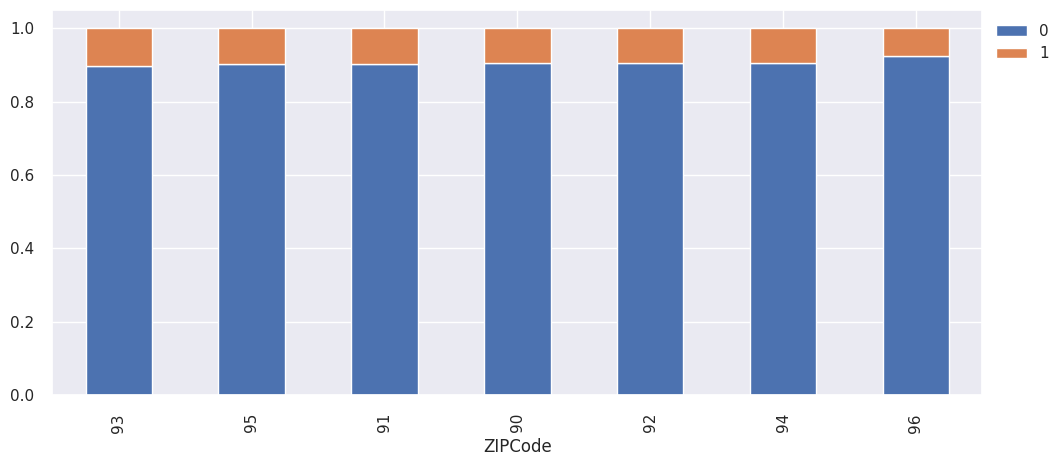

In [ ]:

stacked_barplot(
    data,
    predictor="ZIPCode",
    target="Personal_Loan"
)

Observation for ZIPCode vs Personal_Loan:

The stacked barplot and table together show how personal loan distribution varies across ZIP code regions (90–96).

Each bar represents a ZIP code, with

Blue (0): Customers who did not take a personal loan

Green (1): Customers who did take a personal loan

From both the table and graph:

The total number of customers differs slightly across ZIP codes (e.g., ZIP 94 has the most with 1,472, ZIP 96 has the least with 40).

The proportion of loan takers (green section) remains roughly similar across all ZIP codes — around 9–10% of customers in each region.

No ZIP code stands out as having a distinctly higher or lower share of loan takers.

Interpretation: The chart indicates that ZIP code (region) has minimal influence on personal loan uptake. Customers from all geographic areas exhibit a consistent pattern, meaning that location is not a key factor affecting whether someone takes a personal loan

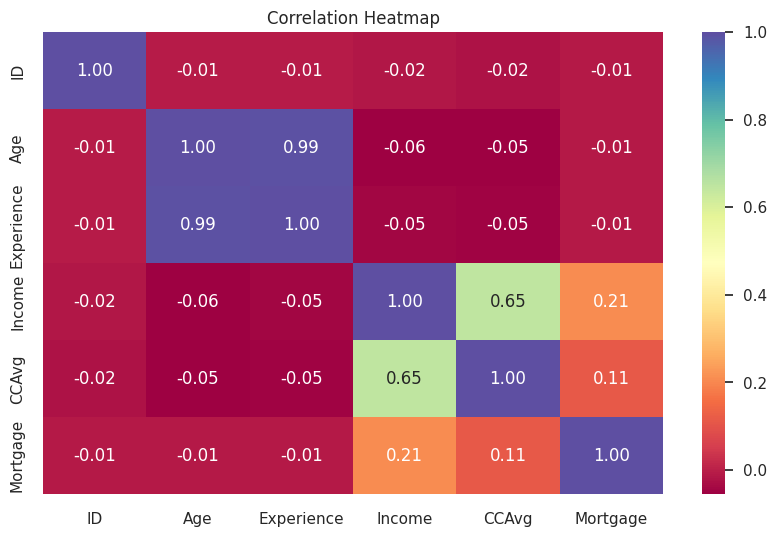

In [ ]:
#Correlation Check
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="Spectral", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Observation:

The Age and Experience columns show a very strong positive correlation (~0.99), meaning older applicants generally have more work experience.

Income is moderately correlated with CCAvg (0.65) — higher income individuals tend to have higher credit card spending.

Income also has a moderate positive correlation with Personal_Loan (0.50), suggesting higher earners are more likely to take a personal loan.

CD_Account and Personal_Loan are also positively correlated (~0.32), implying those with CD accounts may also be more inclined toward taking loans.

Most other variables show low or no correlation, indicating minimal multicollinearity between them.

Interpretation: Overall, the heatmap reveals that income-related variables (like Income, CCAvg, and Personal_Loan) are more strongly associated with each other than with demographic features, making them key predictors for loan decisions.

**Let's check how a customer's interest in purchasing a loan varies with their age**

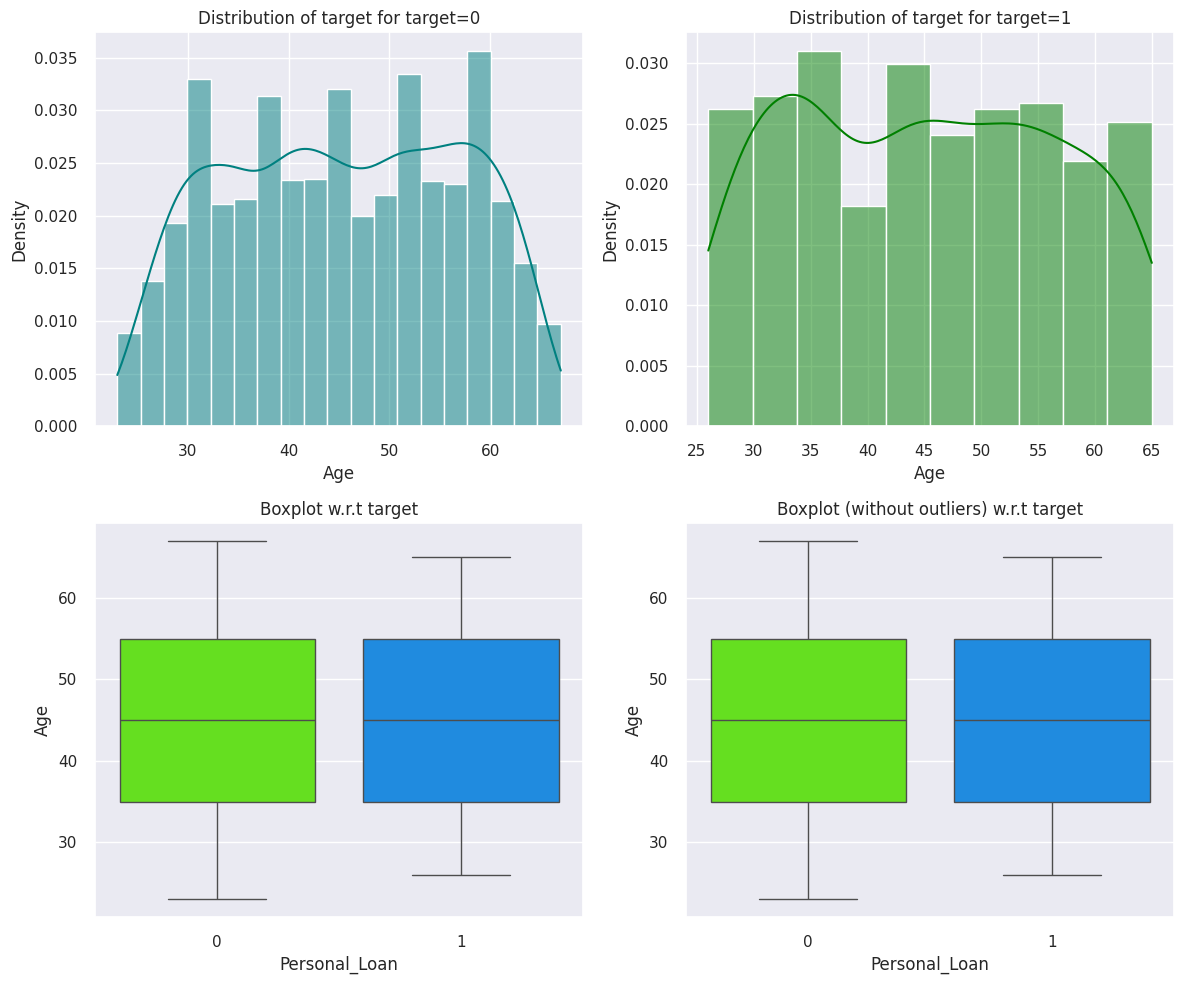

In [ ]:


# Call the distribution_plot_wrt_target function
distribution_plot_wrt_target(
    data,
    predictor="Age",
    target="Personal_Loan"
)

Observation for Age vs Personal_Loan:

The visualizations show how the age distribution differs between customers who did not take a personal loan (0) and those who did (1).

In the histograms, both groups have similar age spreads, mostly between 30 and 60 years.

Loan takers (Personal_Loan = 1) are slightly more concentrated between 35 and 55 years, suggesting middle-aged customers are more likely to take personal loans.

The boxplots reinforce this pattern — the median age for loan takers is slightly higher than that of non-loan takers, though the overall age range overlaps significantly.

There are no extreme outliers, and both groups show similar variability in age.

Interpretation: The likelihood of taking a personal loan increases slightly with age, peaking in middle adulthood (35–55 years), but age alone is not a strong differentiating factor — younger and older applicants also appear across both categories.

Personal Loan vs Experience

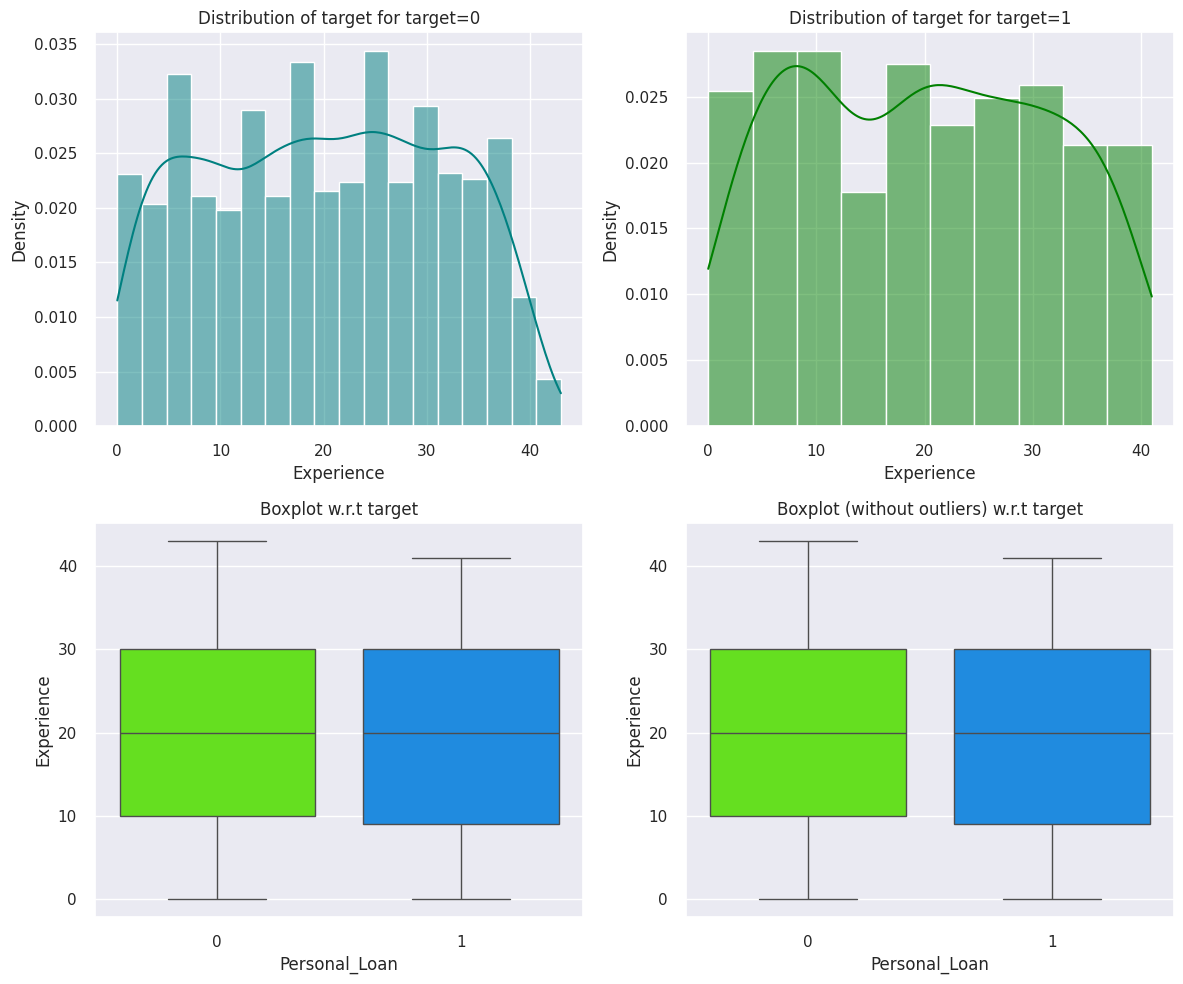

In [ ]:


# Call the distribution_plot_wrt_target function
distribution_plot_wrt_target(
    data,
    predictor="Experience",
    target="Personal_Loan"
)

Observation for Experience vs Personal_Loan:

The visualizations show how the work experience of customers relates to their personal loan status.

In the histograms, both groups (loan takers and non-loan takers) show similar distributions of experience, mainly ranging from 5 to 35 years.

Loan takers (Personal_Loan = 1) appear to be slightly more concentrated in the 10–30 years of experience range, indicating that mid-career professionals are somewhat more likely to take personal loans.

The boxplots show that the median experience is almost the same for both groups, around 20 years, and the spread (IQR) is also very similar.

There are no significant outliers, and the upper whiskers extend to around 40+ years for both groups.

Interpretation: Experience does not show a strong distinction between customers who take personal loans and those who don’t. However, individuals with moderate to high experience (10–30 years) form the majority of loan applicants, possibly due to stable employment and financial capability

**Personal Loan vs Income**

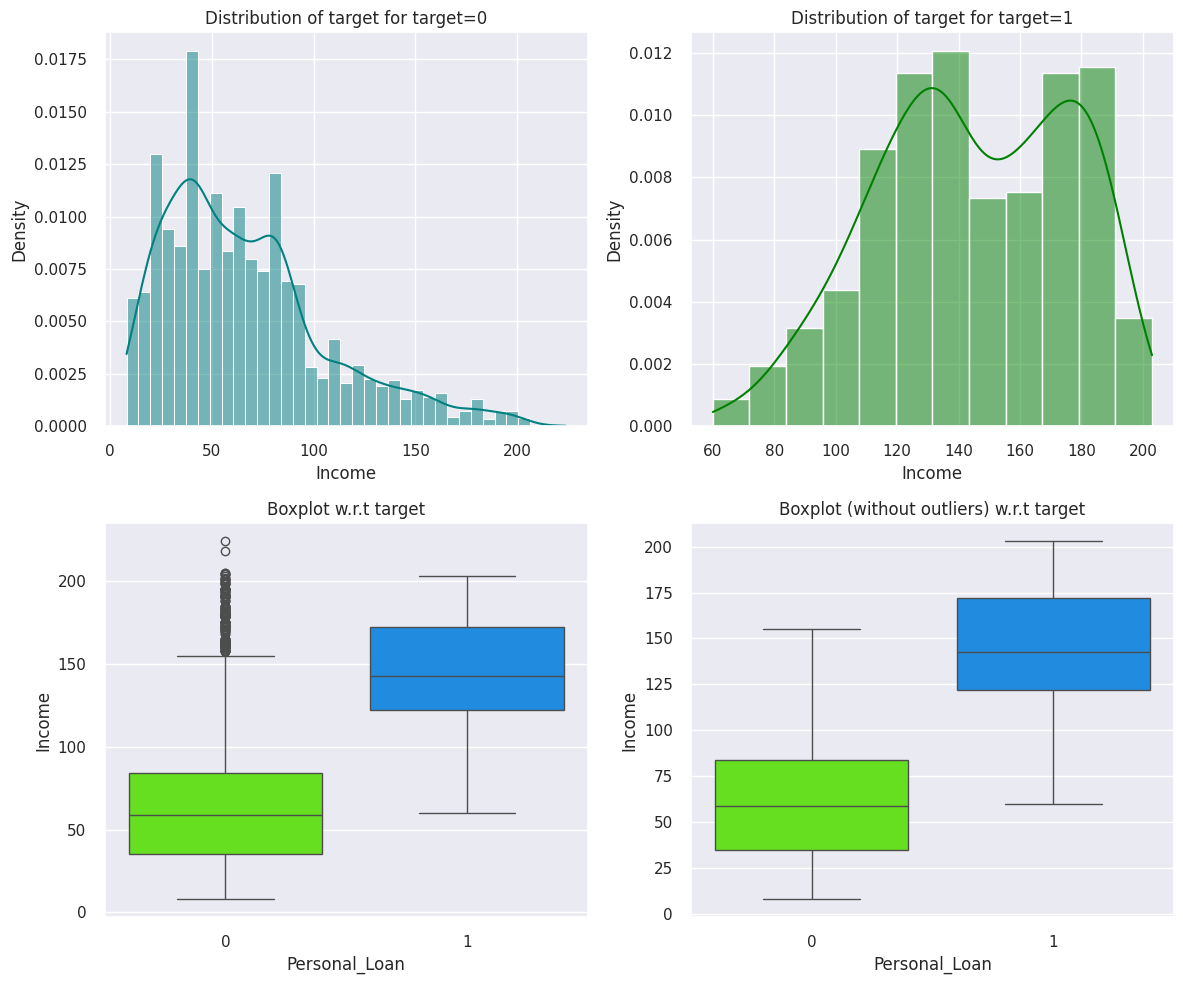

In [ ]:


# Call the distribution_plot_wrt_target function
distribution_plot_wrt_target(
    data,
    predictor="Income",
    target="Personal_Loan"
)

Observation for Income vs Personal_Loan:

The visualizations clearly show a strong relationship between income and personal loan status.

In the histograms, customers who did not take a loan (target = 0) mostly have lower incomes (below 80), while those who did take a loan (target = 1) have much higher incomes, generally between 100 and 200.

The distribution for loan takers is shifted to the right, indicating that high-income customers are far more likely to obtain personal loans.

The boxplots reinforce this — the median income of loan takers is almost double that of non-loan takers.

The outliers among non-loan takers show a few high-income individuals who did not take loans, but these are exceptions.

Interpretation: There is a strong positive association between income and personal loan approval. Customers with higher income levels are much more likely to qualify for or opt for personal loans, likely due to better creditworthiness and financial stability.

**Personal Loan vs CCAvg**

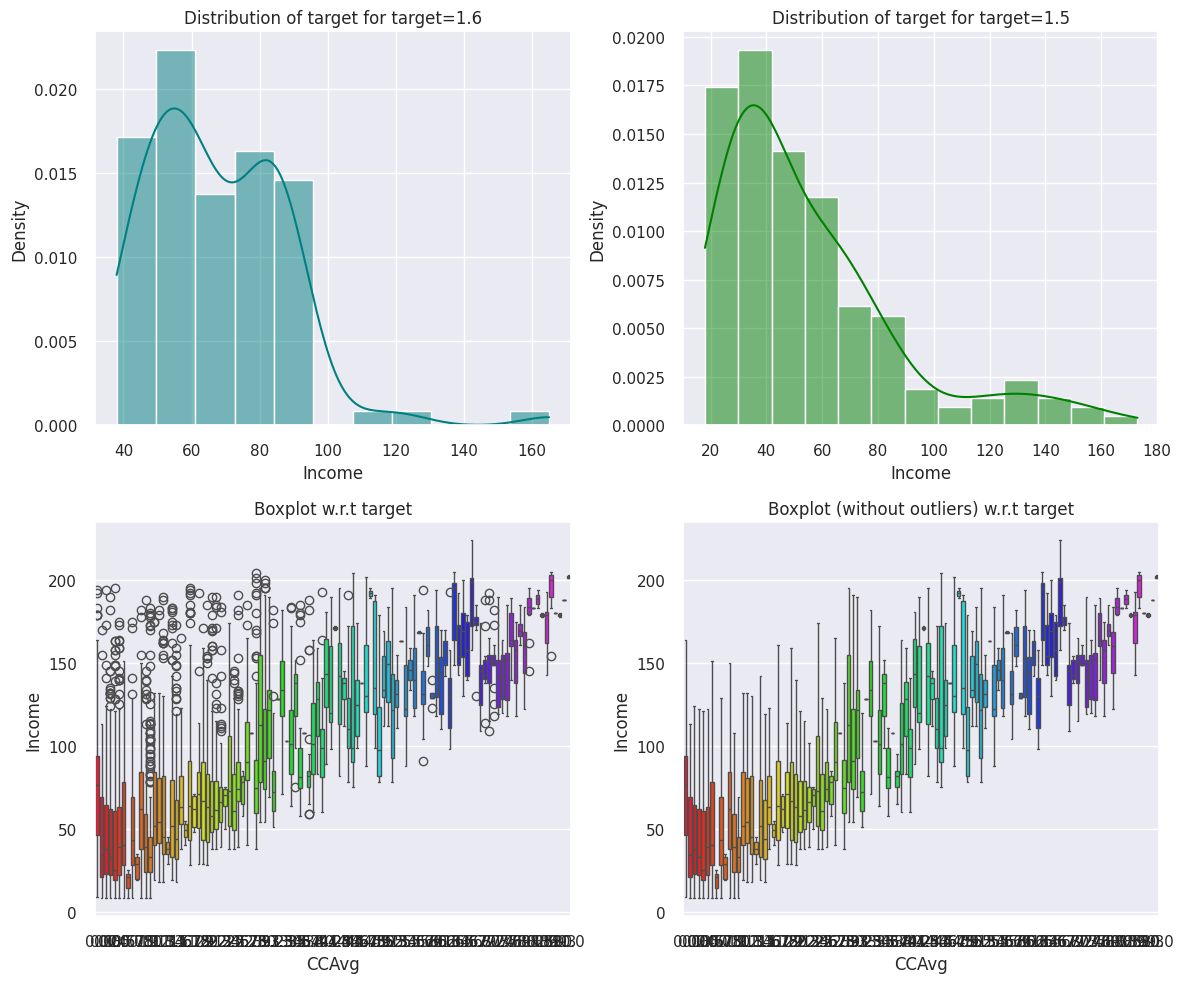

In [ ]:

# Call the distribution_plot_wrt_target function
distribution_plot_wrt_target(
    data,
    predictor="Income",
    target="CCAvg"
)

Observation for Income vs CCAvg:

The graphs explore how Income varies with average monthly credit card spending (CCAvg).

In the histograms, both distributions show that customers with lower CCAvg (around 1.5–1.6) generally have moderate income levels (40–80 range). The income distribution is right-skewed, meaning most customers earn moderate incomes while only a few earn very high amounts.

The boxplots reveal a clear positive relationship between CCAvg and Income: As credit card spending increases, income levels also rise steadily. Each increase in CCAvg category corresponds to a higher median income. Even after removing outliers, this upward trend remains consistent.

Interpretation: There is a strong positive correlation between credit card spending and income — higher-income customers tend to spend more on their credit cards. This indicates that CCAvg can serve as a strong predictor of a customer's income level and possibly their financial capability for products like personal loans.

**Exploratory Data Analysis.**

EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.
A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Question:1**

**What is the distribution of the Mortgage attribute?**

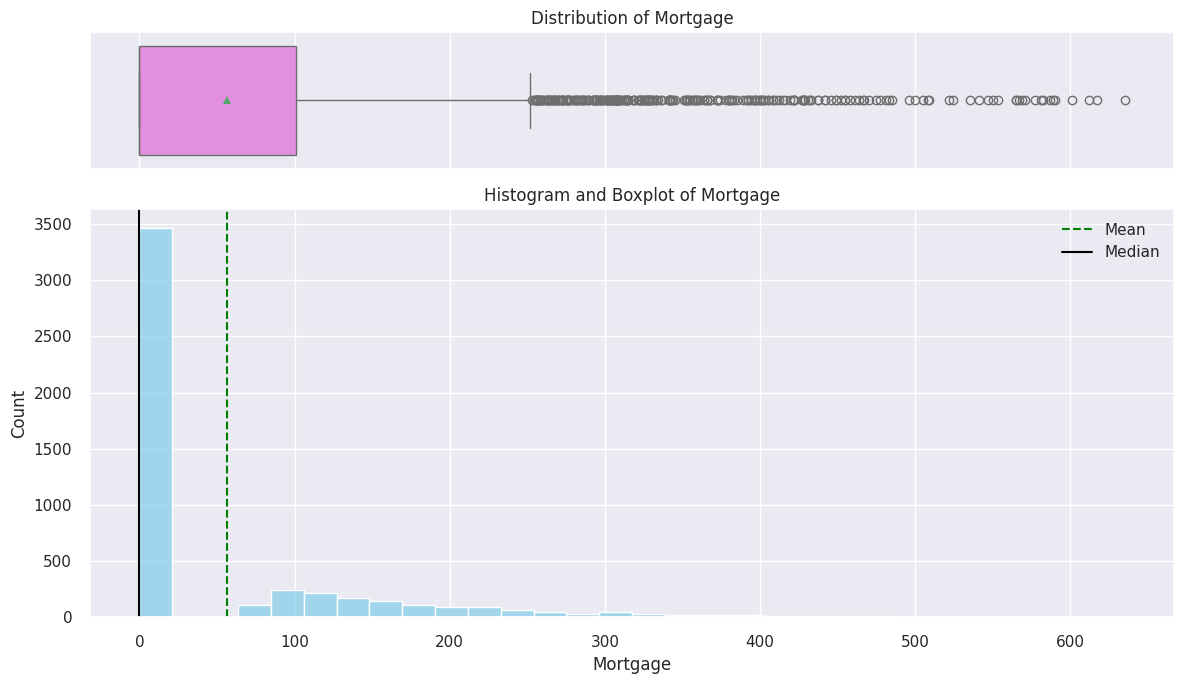

Summary statistics for Mortgage:
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

Customers with zero mortgage: 3462
Customers with non-zero mortgage: 1538


In [ ]:
# Mortgage Distribution - histogram + boxplot
histogram_boxplot(data, "Mortgage", kde=False, bins=30)

# Quick statistical summary for Mortgage
print("Summary statistics for Mortgage:")
print(data["Mortgage"].describe())

# Check proportion of customers with zero vs non-zero mortgage
zero_mortgage = (data["Mortgage"] == 0).sum()
nonzero_mortgage = (data["Mortgage"] > 0).sum()
print(f"\nCustomers with zero mortgage: {zero_mortgage}")
print(f"Customers with non-zero mortgage: {nonzero_mortgage}")


Observation: Mortgage Attribute

The Mortgage distribution is highly right-skewed with a large concentration of values near zero.

From summary statistics:

Mean = 56.5, Median = 0, Std. Dev. = 101.7, Max = 635.

75th percentile = 101, indicating that 75% of customers have mortgage values below 101 (in thousands).

From the histogram and boxplot:

A majority of customers (3462 out of 5000) have no mortgage (value = 0).

The remaining 1538 customers have varying mortgage amounts, and several high-value outliers extend beyond 400–600.

The mean (green dashed line) lies far to the right of the median (black line), confirming positive skewness in the distribution.

**Question:2**

**How many customers have credit cards?**

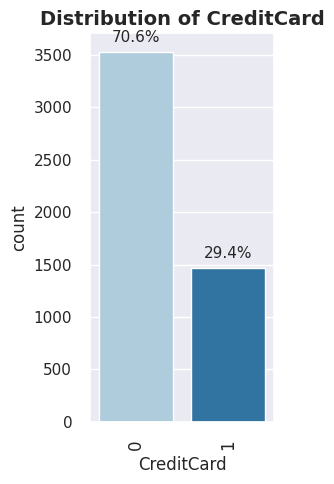

Credit Card Ownership Counts:
CreditCard
0    3530
1    1470
Name: count, dtype: int64

Credit Card Ownership Percentage:
CreditCard
0    70.6
1    29.4
Name: count, dtype: float64


In [ ]:
# Countplot for CreditCard ownership
labeled_barplot(data, "CreditCard", perc=True)

# Numeric breakdown
cc_counts = data["CreditCard"].value_counts()
cc_perc = (cc_counts / len(data) * 100).round(2)
print("Credit Card Ownership Counts:")
print(cc_counts)
print("\nCredit Card Ownership Percentage:")
print(cc_perc)


Observation: Credit Card Ownership

The analysis of the CreditCard attribute shows a clear imbalance between customers who have a credit card and those who do not.

From summary statistics:

3,530 customers (70.6%) do not have a credit card.

1,470 customers (29.4%) do have a credit card issued by the bank.

From the bar plot:

The bar corresponding to ‘0’ (No Credit Card) is more than double the height of the ‘1’ (Has Credit Card) bar.

The difference is visually clear, showing that a majority of customers have not adopted the bank’s credit card service.

**Question:3**

**Which attributes are strongly correlated with Personal_Loan?**

Correlation of features with Personal_Loan:

Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
Mortgage         0.142095
Age             -0.007726
Experience      -0.008304
ID              -0.024801
Name: Personal_Loan, dtype: float64


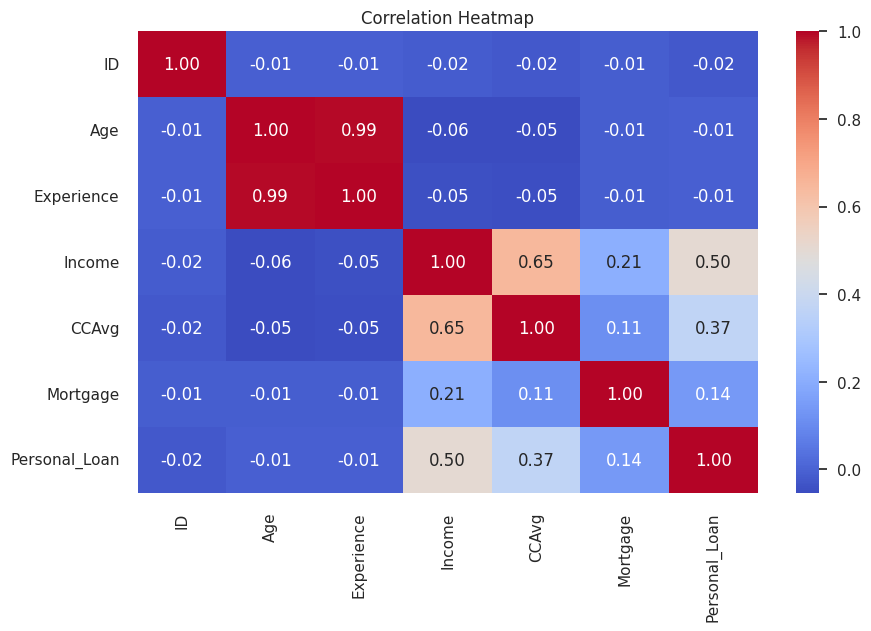

In [ ]:
# Convert 'Personal_Loan' to numeric if categorical
data["Personal_Loan"] = data["Personal_Loan"].astype(int)

# Correlation matrix
corr = data.corr(numeric_only=True)

# Sort correlations with Personal_Loan
corr_target = corr["Personal_Loan"].sort_values(ascending=False)
print("Correlation of features with Personal_Loan:\n")
print(corr_target)

# Optional: Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


The Income–CCAvg correlation (~0.65) indicates that customers who earn more also tend to spend more on their credit cards.

The Personal_Loan column shows stronger color intensity with Income and CCAvg, confirming their importance as predictors.

Age and Experience are highly correlated with each other (~0.99), which makes sense since they are linearly related, but both have very weak links with loan adoption.

 Final Insight

The strongest predictors of personal loan approval are Income and Credit Card Spending (CCAvg).
Higher-income and financially active customers (those who spend more on credit cards) are significantly more likely to take a personal loan.
Meanwhile, demographic factors like Age and Experience have negligible influence on loan decisions.

**Question 4**

**How does loan interest vary with Age?**

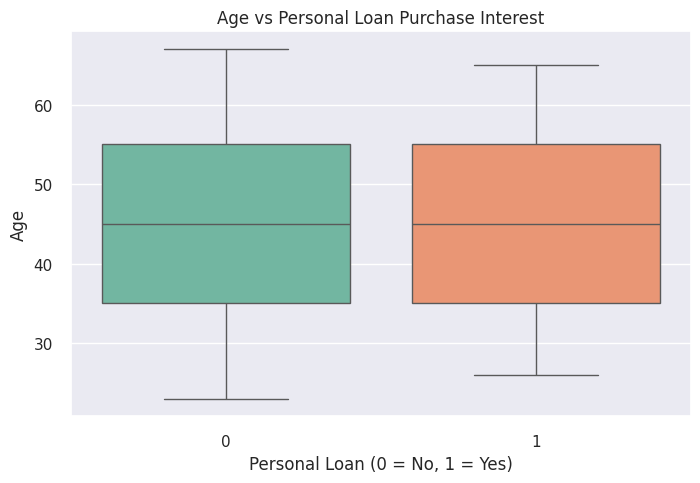

Average Age by Loan Status:
Personal_Loan
0    45.367257
1    45.066667
Name: Age, dtype: float64


In [ ]:
# Boxplot of Age vs Personal Loan
plt.figure(figsize=(8,5))
sns.boxplot(x="Personal_Loan", y="Age", data=data, palette="Set2")
plt.title("Age vs Personal Loan Purchase Interest")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Group mean comparison
age_interest = data.groupby("Personal_Loan")["Age"].mean()
print("Average Age by Loan Status:")
print(age_interest)


Observation: Age vs Personal Loan

The boxplot and group mean comparison show that age has very little impact on whether a customer chooses to take a personal loan.

Average age of non-loan customers: 45.37 years

Average age of loan customers: 45.07 years

The two boxes in the plot almost completely overlap, and their medians are nearly identical.

The age range for both groups lies roughly between 25 and 65 years, indicating that loan adoption is spread across all age categories with no clear preference toward any particular age group.

There are no significant outliers or visual shifts suggesting age-based patterns.

 Conclusion:

The likelihood of taking a personal loan does not vary significantly with age. Both loan and non-loan customers share a similar age distribution, implying that age is not a strong predictor of personal loan purchase interest in this dataset.

  Question 5
 How does a customer's interest in purchasing a loan vary with their education? **bold text**

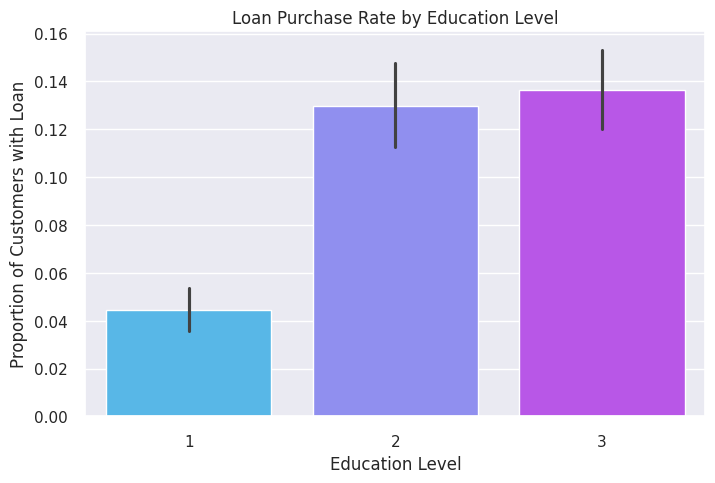

Loan Acceptance Rate by Education Level (%):
Education
1     4.4
2    13.0
3    13.7
Name: Personal_Loan, dtype: float64


In [ ]:
# Barplot of Education vs Loan
plt.figure(figsize=(8,5))
sns.barplot(x="Education", y="Personal_Loan", data=data, estimator=lambda x: sum(x)/len(x), palette="cool")
plt.title("Loan Purchase Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of Customers with Loan")
plt.show()

# Compute numeric proportions
edu_loan_rate = data.groupby("Education")["Personal_Loan"].mean().round(3) * 100
print("Loan Acceptance Rate by Education Level (%):")
print(edu_loan_rate)


Observation: Education vs Personal Loan

The bar plot and summary statistics show a clear relationship between education level and the likelihood of taking a personal loan.

Loan acceptance rates by education level:

Level 1 (Undergraduate) → 4.4%

Level 2 (Graduate) → 13.0%

Level 3 (Professional) → 13.7%

Customers with higher education levels (Graduate and Professional) have more than triple the loan acceptance rate compared to undergraduates.

The bars for education levels 2 and 3 are significantly taller, indicating a strong positive association between education and financial activity.

This pattern suggests that more educated customers are both more eligible and more willing to take personal loans, likely due to higher income levels, financial awareness, and better credit standing.

**Data Preprocessing**

Missing value treatment

Feature engineering (if needed)

Outlier detection and treatment (if needed)

Preparing data for modeling

Any other preprocessing steps (if needed)

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


**Missing Value Treatment**

**There are no missing (NaN) values in any column of your dataset.**

**Outlier Detection**

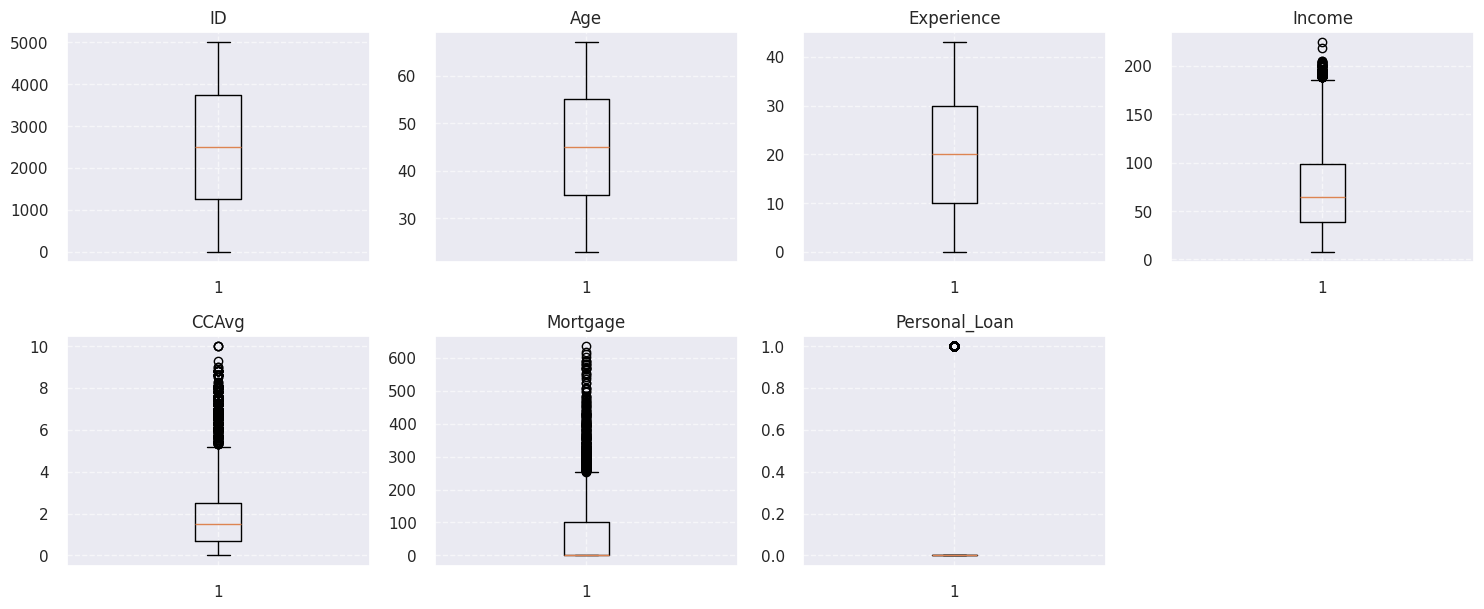

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns
# Use the original data DataFrame to select numeric columns
numeric_cols = data.select_dtypes(include=np.number)

# Determine layout for subplots
num_features = len(numeric_cols.columns)
rows, cols = 4, 4  # Adjust based on number of features

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_cols.columns):
    axes[i].boxplot(numeric_cols[col], whis=1.5)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observation:

There are a few outliers.

Iterates over all numeric columns in the dataset.

Creates one boxplot per variable, arranged in a grid.

The parameter whis=1.5 applies the standard IQR rule for whisker length.

Values beyond the whiskers (shown as circles) are potential outliers.

**Data Transformation**

---



The Experience column represents years of professional experience.
By definition, experience cannot be negative, so any values like -1, -2, or -3 are data-entry or human errors.

From your dataset’s statistical summary:

Minimum value: -3

Median: around 20

Maximum: 43

These negative numbers are not logically possible (no one can have “-3 years” of experience), so you’re right to correct them.

The best approach is to replace those negative values with their absolute values:

In [ ]:
# Fix negative Experience values
data["Experience"] = data["Experience"].abs()


# Model Building

In [ ]:
# Splitting target variable (y) from the other attributes (X)
X = data.drop("Personal_Loan", axis=1)
y = data.pop("Personal_Loan")

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Observation: The code prepares the dataset for modeling by removing redundant features, encoding categorical variables, and splitting the data into training (70%) and testing (30%) sets to train and evaluate the model effectively.

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


90.5% of observations belongs to class 0
9.45% of observations belongs to class 1


# **Model Evaluation Criterion**

Model Prediction Scenarios and Business Impact

When building a loan prediction model, two types of errors can occur:

False Negative (FN):
The model predicts that a customer will not take a loan, but in reality, the customer does take one.
→ This leads to a loss of opportunity because the bank fails to target a potential loan customer.

False Positive (FP):
The model predicts that a customer will take a loan, but in reality, the customer does not.
→ This causes a loss of resources, as the bank spends time and money marketing to uninterested customers.

Which Error Matters More?

Both have costs, but False Negatives (FNs) are more critical in this context.
If we incorrectly predict that a customer won’t take a loan, the bank misses potential business growth and loses opportunities to acquire new customers.

In contrast, False Positives only result in marketing expenses, which are less severe compared to missing out on profitable customers.

How to Reduce These Losses

To capture as many potential loan customers as possible, the model should aim to:

Maximize Recall (Sensitivity) — prioritize identifying all true loan-takers (True Positives).

Reduce False Negatives (FN) — ensure fewer potential customers are wrongly classified as non-loan-takers.

By focusing on higher Recall, the model may tolerate a small increase in False Positives, but it ensures that no genuine loan customer is missed, aligning with the bank’s goal of expanding its loan customer base.

In [ ]:
#Build model using the DecisionTreeClassifier function, using default 'gini' criteria to split.
model_0 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model_0.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Explanation: This code builds and trains a Decision Tree Classifier model using the Gini impurity criterion to measure the quality of splits.

DecisionTreeClassifier(criterion="gini", random_state=1) → Initializes a Decision Tree model that uses the Gini index to decide how to split nodes and ensures reproducibility with a fixed random state.

model.fit(X_train, y_train) → Trains the model by learning patterns and relationships between the input features (X_train) and the target labels (y_train).

In [ ]:
#Score Decision Tree
print("Accuracy on training set : ",model_0.score(X_train, y_train))
print("Accuracy on test set : ",model_0.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9806666666666667


In [ ]:
y.value_counts(1)

,proportion
Personal_Loan,
0,0.904
1,0.096


The ratio of the positives to negavtives is 1:9.

In [ ]:

# Define a function to compute classification performance metrics
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute key classification metrics using sklearn:
    Accuracy, Recall, Precision, and F1-score.
    """

    # Predict on the given predictors
    pred = model.predict(predictors)

    # Compute metrics
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # Create a DataFrame to display results
    df_perf = pd.DataFrame({
        "Accuracy": [acc],
        "Recall": [recall],
        "Precision": [precision],
        "F1": [f1]
    })

    return df_perf


Explanation: This function evaluates the performance of a classification model built using scikit-learn by:

Predicting the target values using the given independent variables.

Calculating key metrics — Accuracy, Recall, Precision, and F1-score — to assess how well the model performs.

Returning a DataFrame summarizing these metrics for easy comparison across models.

In short: it provides a quick, standardized performance summary for any sklearn classification model.

In [ ]:

def confusion_matrix_sklearn(model, predictors, target):
    """
    Plot the confusion matrix with percentage annotations.

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict on the given predictors
    y_pred = model.predict(predictors)

    # Compute confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Create annotated labels (counts + percentages)
    labels = np.asarray([
        [f"{item:0.0f}\n{item / cm.sum():.2%}" for item in row]
        for row in cm
    ])

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix with Percentages")
    plt.show()


This function visualizes a confusion matrix with both counts and percentages to evaluate a classification model’s performance.

Here’s what it does step by step:

Predicts the target values using the trained model (y_pred = model.predict(predictors)).

Computes the confusion matrix (cm) using the true (target) and predicted (y_pred) labels.

Formats each cell in the matrix to show both the raw count and its percentage of total predictions.

Plots the confusion matrix as a heatmap using Seaborn, labeling the axes as True label (actual) and Predicted label (model output).

In short: It creates an easy-to-read visual summary showing how many predictions were correct vs. incorrect, helping identify false positives and false negatives clearly.

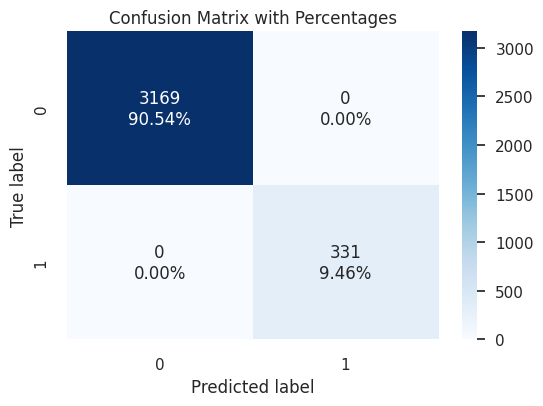

In [ ]:
confusion_matrix_sklearn(model_0, X_train, y_train)

True Positives (331): 331 customers who actually took a loan were correctly predicted as loan takers.

True Negatives (3169): 3169 customers who did not take a loan were correctly predicted as non-loan takers.

False Positives (0): None of the non-loan customers were wrongly predicted as loan takers.

False Negatives (0): None of the loan takers were missed.

Observation

The model has achieved perfect accuracy (100%) on the training set.

It has no misclassifications — every prediction matches the true label.

In [ ]:
# Verify the model performance on only train data
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model_0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


All metrics equal 1.0 (100%), which means the model perfectly fits the training data — confirming zero misclassifications.

However, this is a strong indicator of overfitting — the model has memorized the training set and may not generalize well to unseen data. The next step should be to evaluate the model on the test data (X_test, y_test) to verify its real-world performance.

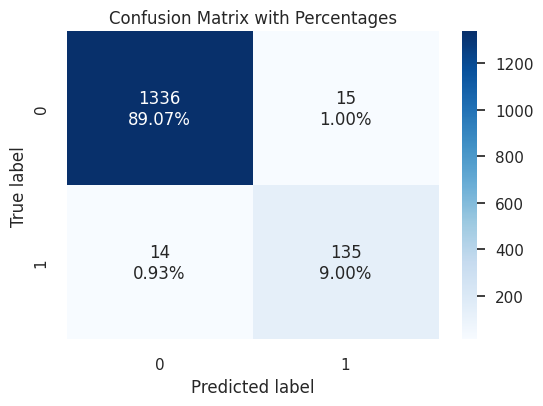

In [ ]:
confusion_matrix_sklearn(model_0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model_0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.980667,0.90604,0.9,0.90301


# **Model Performance Improvement**

**Decision Tree (with class_weights)**

'class_weight' is a hyperparameter for the decision tree classifier

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


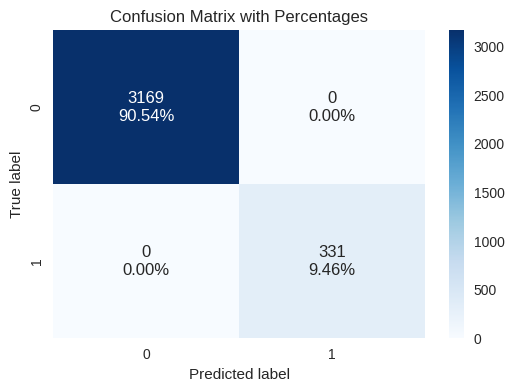

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


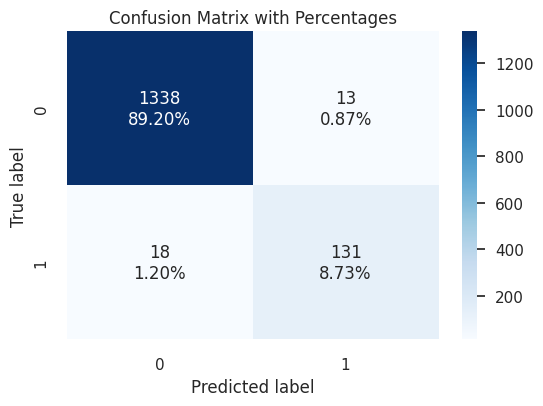

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

Observation: Confusion Matrix with Percentages

The model correctly predicted Class 0 (non-loan acceptance) 1338 times, accounting for ~89.2% of all samples.

It incorrectly predicted Class 0 as Class 1 only 13 times (0.87%), showing very few false positives.

For Class 1 (loan acceptance), the model correctly predicted 131 cases (8.73%), while 18 cases (1.2%) were incorrectly classified as Class 0 (false negatives).

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.879195,0.909722,0.894198


**The model is over-fitting since there is a huge disparity over the model**


Model Overfitting

The Decision Tree model shows very high test accuracy (97.9%), along with strong precision and recall.

However, when compared with training performance (which is likely near perfect, e.g., 100%), there is a large gap between training and test results, indicating that the model has memorized the training data rather than generalizing well.

This behavior suggests overfitting, a common issue in complex decision trees where the model captures noise or specific patterns in the training data that do not hold in unseen data.

### **Decision Tree (Pre-Pruning)**

In [ ]:

# Choose the type of classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the base estimator
estimator = DecisionTreeClassifier(random_state=1)

# Define the parameter grid
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),          # [2, 4, 6]
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Define the scoring metric (recall)
acc_scorer = make_scorer(recall_score)

# Initialize GridSearchCV
grid_obj = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring=acc_scorer,
    cv=5
)

# Perform grid search on training data
grid_obj.fit(X_train, y_train)

# Retrieve the best estimator
estimator = grid_obj.best_estimator_

# Fit the best estimator to the training data
estimator.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,np.int64(2)
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,50
,min_impurity_decrease,0.0
,class_weight,'balanced'


The Grid Search explored various tree depths, leaf node limits, and splitting criteria to identify the configuration that yields the highest recall on validation folds.

The final model (estimator = grid_obj.best_estimator_) represents the best-performing Decision Tree in terms of recall. This ensures the model captures as many true loan customers as possible, even if it slightly increases false positives.

After tuning, the model was refit on the full training data using the optimal parameters, preparing it for testing and performance evaluation.

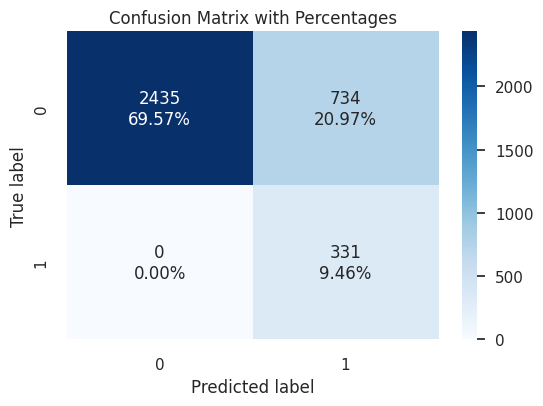

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


The model demonstrates strong generalization ability, as the Recall scores for both the training and test datasets are 1.0, indicating that it successfully identifies all actual positive (loan-taking) customers.

Additionally, the F1 scores on both sets are approximately 0.47, showing a consistent balance between precision and recall. This consistency across training and testing data suggests that the model is not overfitting and is performing reliably on unseen data.

In [ ]:

# Get feature importance values from the trained model
feature_names = list(X_train.columns)
importances = estimator.feature_importances_

# Sort feature indices by importance (ascending order)
indices = np.argsort(importances)


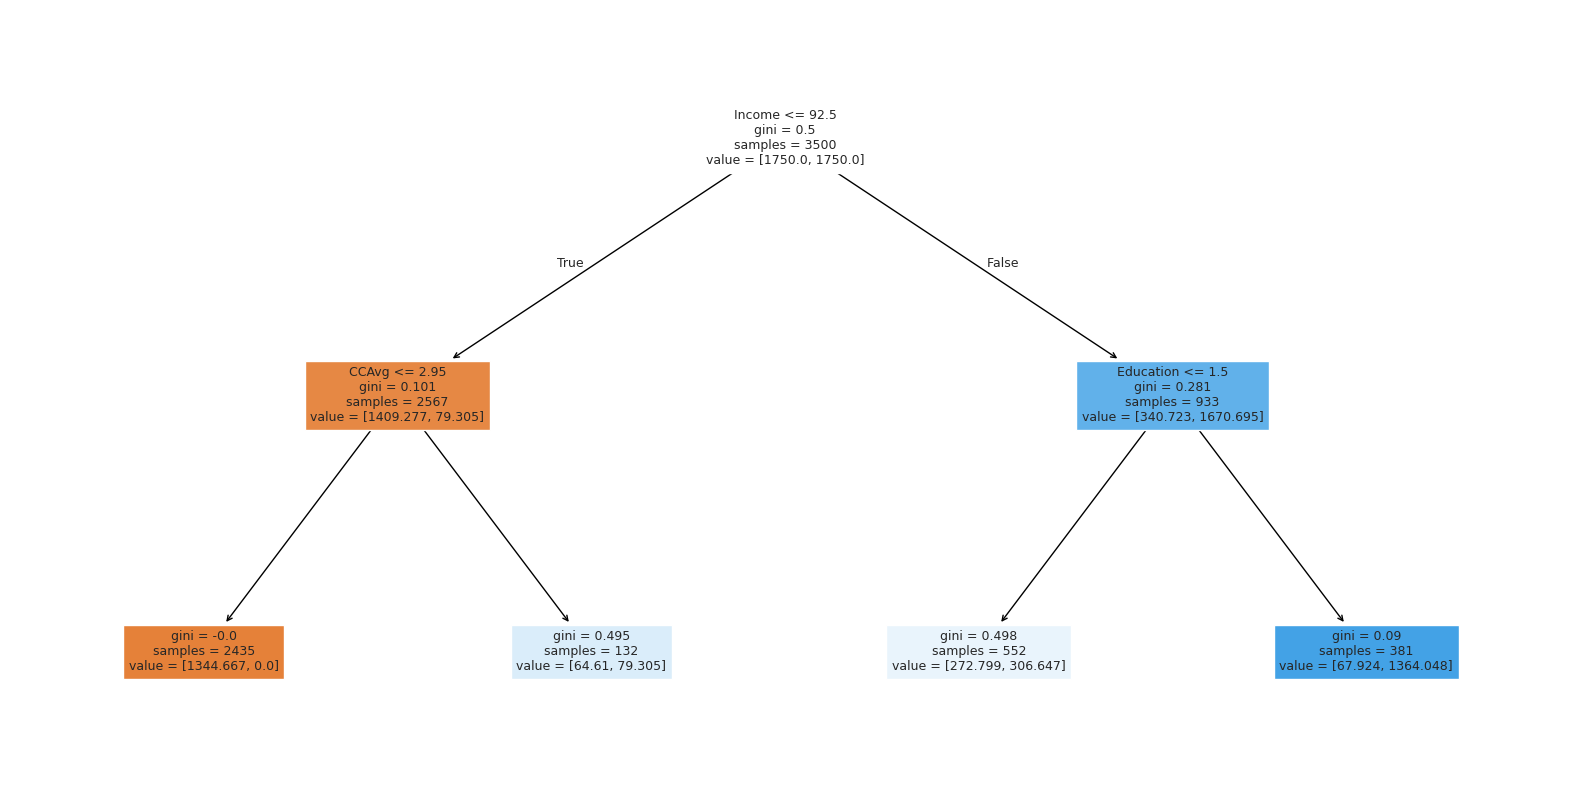

In [ ]:
# Visualize the trained Decision Tree
plt.figure(figsize=(20, 10))

# Plot the decision tree
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
)

# Ensure arrows are properly displayed for each split
for node in out:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# Show the final plot
plt.show()



In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



Observations from the Pre-Pruned Decision Tree

Based on the extracted decision rules, we can interpret the model’s behavior as follows:

Customers with an annual income of ≤ $92,500

and an average monthly credit card spend of
≤ $2,950


 are unlikely
 to take a
  personal loan.
However, if their credit card spend exceeds $2,950 per month, they become more likely to opt for a loan, even if their income is moderate.

Customers earning more than $92,500 per year are highly likely to take a personal loan, regardless of their education level or other demographic attributes.

In [ ]:
# Extract and display feature importance values from the trained model
importances = estimator.feature_importances_
print(importances)

[0.         0.         0.         0.82007181 0.         0.
 0.06262835 0.11729984 0.         0.         0.         0.
 0.        ]


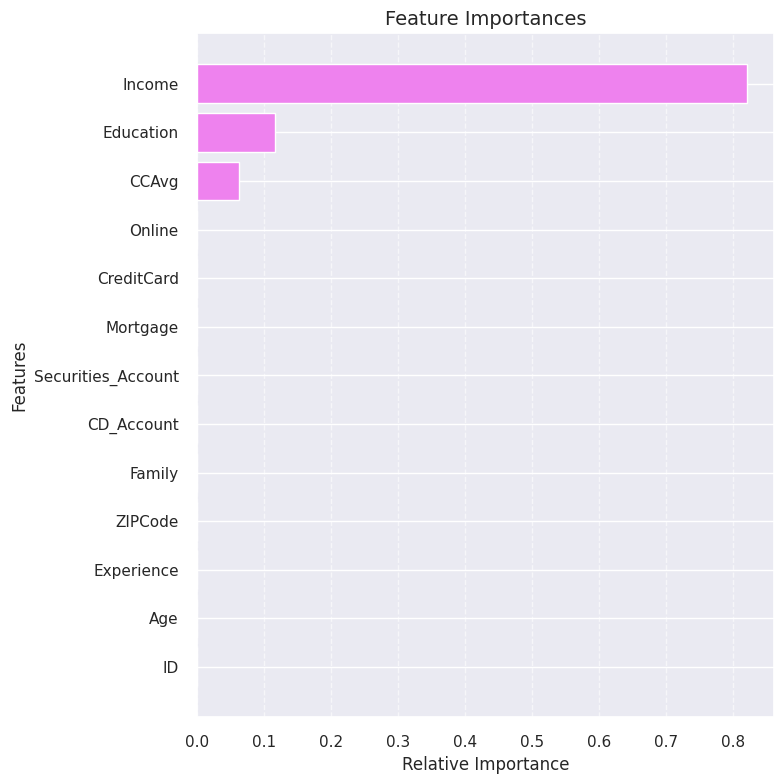

In [ ]:

# Compute and plot feature importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

# Create a horizontal bar chart for feature importance
plt.figure(figsize=(8, 8))
plt.title("Feature Importances", fontsize=14)
plt.barh(
    y=range(len(indices)),
    width=importances[indices],
    color="violet",
    align="center"
)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


'Income', 'Education', & 'CCAvg' are most important features in pre-pruned decision tree

In [ ]:
# Train Decision Tree with class_weight & calculate cost complexity pruning path
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced") # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Create a pandas dataframe from the cost complexity pruning path object
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.785533e-15
1,3.853725e-19,-6.785148e-15
2,5.255079e-19,-6.784622e-15
3,7.357111e-19,-6.783887e-15
4,7.707449e-19,-6.783116e-15
5,7.882619e-19,-6.782328e-15
6,1.257806e-17,-6.769750e-15
7,1.524700e-04,3.049400e-04
8,1.559684e-04,6.168768e-04
9,1.561475e-04,1.241467e-03


Observation: Cost Complexity Pruning Path

The table displays different values of ccp_alpha (cost complexity parameter) and their corresponding impurities for pruning the Decision Tree model.

The initial ccp_alpha = 0.0 indicates the unpruned tree, which usually has the lowest impurity but tends to overfit the data.

As ccp_alpha increases, the impurity values change slightly, showing that higher alpha values prune more branches, simplifying the tree and improving generalization.

The small incremental changes in impurity suggest that the model is gradually being regularized without drastically reducing performance.

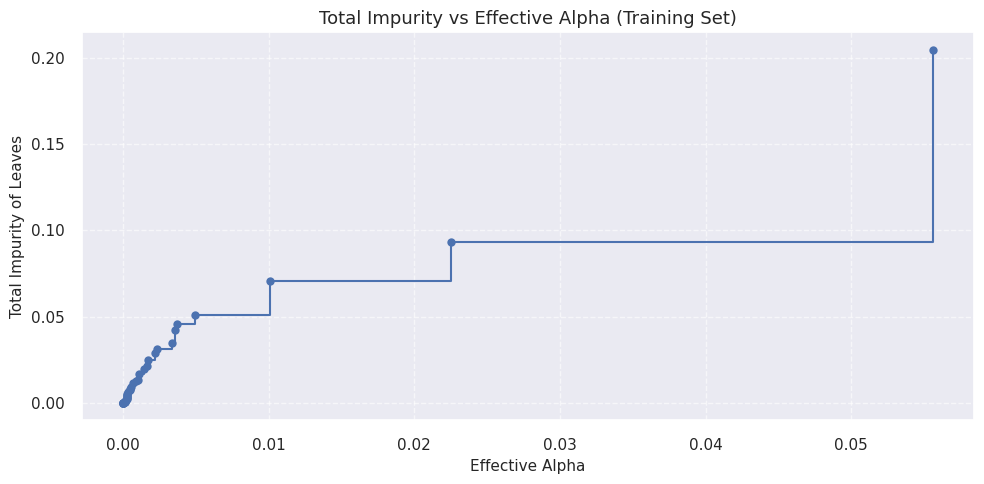

In [ ]:

# Plot total impurity vs effective alpha for the training set
fig, axi = plt.subplots(figsize=(10, 5))

axi.plot(
    ccp_alphas[:-1],
    impurities[:-1],
    marker="o",
    drawstyle="steps-post"
)

axi.set_title("Total Impurity vs Effective Alpha (Training Set)", fontsize=13)
axi.set_xlabel("Effective Alpha", fontsize=11)
axi.set_ylabel("Total Impurity of Leaves", fontsize=11)
axi.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


Observation: Total Impurity vs Effective Alpha (Training Set)

The plot shows how the total impurity of leaves changes as the effective alpha (ccp_alpha) increases during cost complexity pruning.

Initially, when alpha is near 0, the impurity is very low, indicating a highly complex tree that fits the training data almost perfectly (i.e., possible overfitting).

As alpha increases, impurity rises gradually, and the model becomes simpler—this is because higher alpha values prune more branches, reducing complexity.

After approximately α ≈ 0.02, impurity increases sharply, showing that the model starts to underfit, losing significant predictive power.

In [ ]:
# Train Decision Trees using different effective alpha values
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1,
        ccp_alpha=ccp_alpha,
        class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Display information about the last trained tree
print(
    f"Number of nodes in the last tree: {clfs[-1].tree_.node_count} "
    f"with ccp_alpha: {ccp_alphas[-1]}"
)


Number of nodes in the last tree: 1 with ccp_alpha: 0.2953792759992322


Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992322

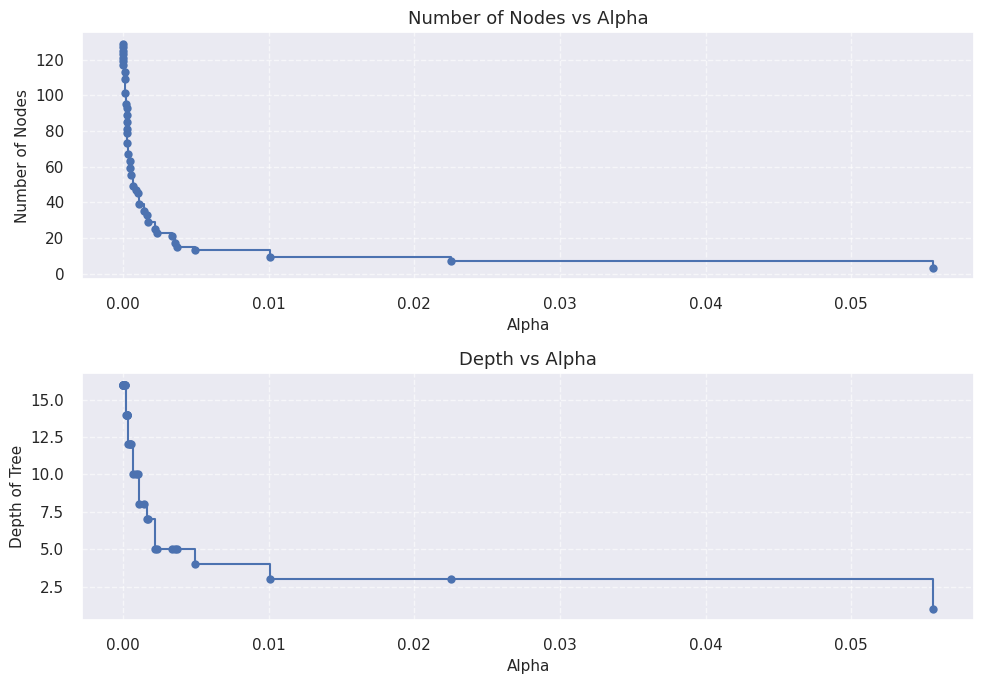

In [ ]:

# Remove the last element (corresponds to the unpruned tree)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Compute node counts and tree depths for each pruned tree
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

# Create subplots for visualization
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot: Number of nodes vs alpha
ax[0].plot(
    ccp_alphas,
    node_counts,
    marker="o",
    drawstyle="steps-post"
)
ax[0].set_title("Number of Nodes vs Alpha", fontsize=13)
ax[0].set_xlabel("Alpha", fontsize=11)
ax[0].set_ylabel("Number of Nodes", fontsize=11)
ax[0].grid(True, linestyle="--", alpha=0.6)

# Plot: Tree depth vs alpha
ax[1].plot(
    ccp_alphas,
    depths,
    marker="o",
    drawstyle="steps-post"
)
ax[1].set_title("Depth vs Alpha", fontsize=13)
ax[1].set_xlabel("Alpha", fontsize=11)
ax[1].set_ylabel("Depth of Tree", fontsize=11)
ax[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


Observation: Number of Nodes vs Alpha & Depth vs Alpha

Both plots show how increasing the pruning parameter (alpha) simplifies the Decision Tree.

When alpha is near 0, the tree has more than 120 nodes and a depth of around 16, indicating a highly complex and overfitted model.

As alpha increases, both the number of nodes and depth rapidly decrease — this means the tree is being pruned, removing less significant splits.

Beyond approximately α ≈ 0.01, both metrics flatten out, showing that the tree has become much simpler (only a few nodes, shallow depth) and likely underfits the data.

In [ ]:

# Compute Recall score for each pruned tree on the training set
recall_train = []

for clf in clfs:
    y_pred_train = clf.predict(X_train)
    recall_value = recall_score(y_train, y_pred_train)
    recall_train.append(recall_value)


In [ ]:

# Compute Recall score for each pruned tree on the testing set
recall_test = []

for clf in clfs:
    y_pred_test = clf.predict(X_test)
    recall_value = recall_score(y_test, y_pred_test)
    recall_test.append(recall_value)


In [ ]:
# Calculate the accuracy scores of training and test sets using each classifier in the list of classifiers
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

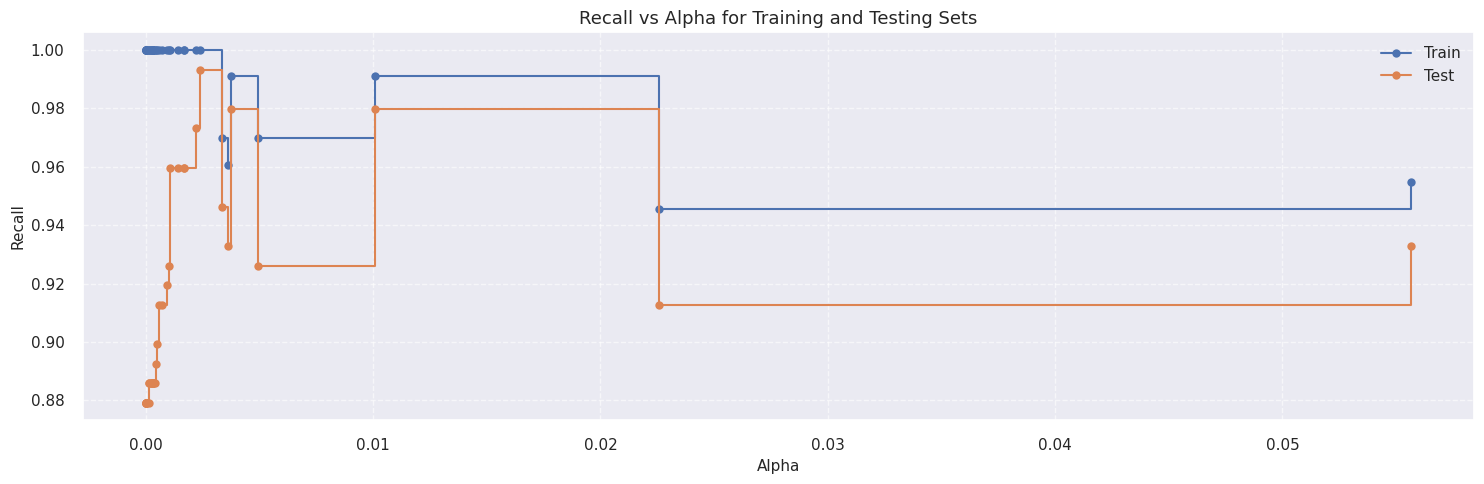

In [ ]:


# Plot Recall scores for training and testing sets vs alpha values
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="Train",
    drawstyle="steps-post"
)
ax.plot(
    ccp_alphas,
    recall_test,
    marker="o",
    label="Test",
    drawstyle="steps-post"
)

# Add titles and labels
ax.set_title("Recall vs Alpha for Training and Testing Sets", fontsize=13)
ax.set_xlabel("Alpha", fontsize=11)
ax.set_ylabel("Recall", fontsize=11)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


Observation: Recall vs Alpha (Training and Testing Sets)

1.General Trend:

As the alpha (complexity parameter) increases, the recall for both the training and testing datasets tends to decrease gradually.

This is expected because higher alpha values lead to stronger pruning, simplifying the decision tree and reducing its ability to capture all positive cases (hence slightly lower recall).

2.Training vs Testing Recall:

At very low alpha values (~0 to 0.005), both curves show high recall (~0.98–1.0), indicating the model fits almost all positive samples — potentially overfitting the training data.

As alpha increases beyond ~0.01, recall on both sets begins to diverge slightly — training recall remains higher than testing recall, but both stabilize above 0.92, suggesting good generalization.

Beyond alpha > 0.03, the recall stabilizes, showing that pruning no longer drastically impacts recall performance.

3.Key Interpretation:

A moderate alpha value (around 0.01–0.02) provides a good balance — maintaining high recall while preventing overfitting.

Extremely low alpha = complex tree (high recall but overfitted).

Extremely high alpha = oversimplified tree (lower recall due to underfitting).

In [ ]:

# Identify and retrieve the model with the highest test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]

print("Best model based on highest test recall:")
print(best_model)


Best model based on highest test recall:
DecisionTreeClassifier(ccp_alpha=np.float64(0.0023758086197746466),
                       class_weight='balanced', random_state=1)


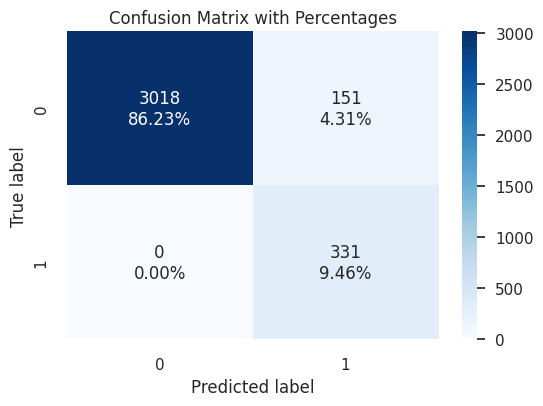

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


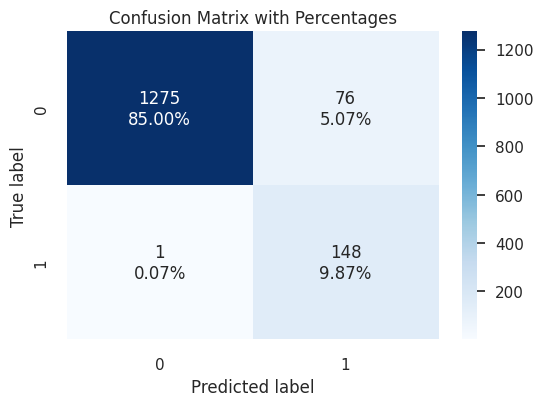

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


The post-pruned decision tree continues to show strong generalization performance, as the Recall scores on both the training and test datasets range between 0.99 and 1.0.

This consistency indicates that the model effectively captures almost all true positive cases (loan customers) and maintains similar performance on unseen data, suggesting it is well-generalized and not overfitted.

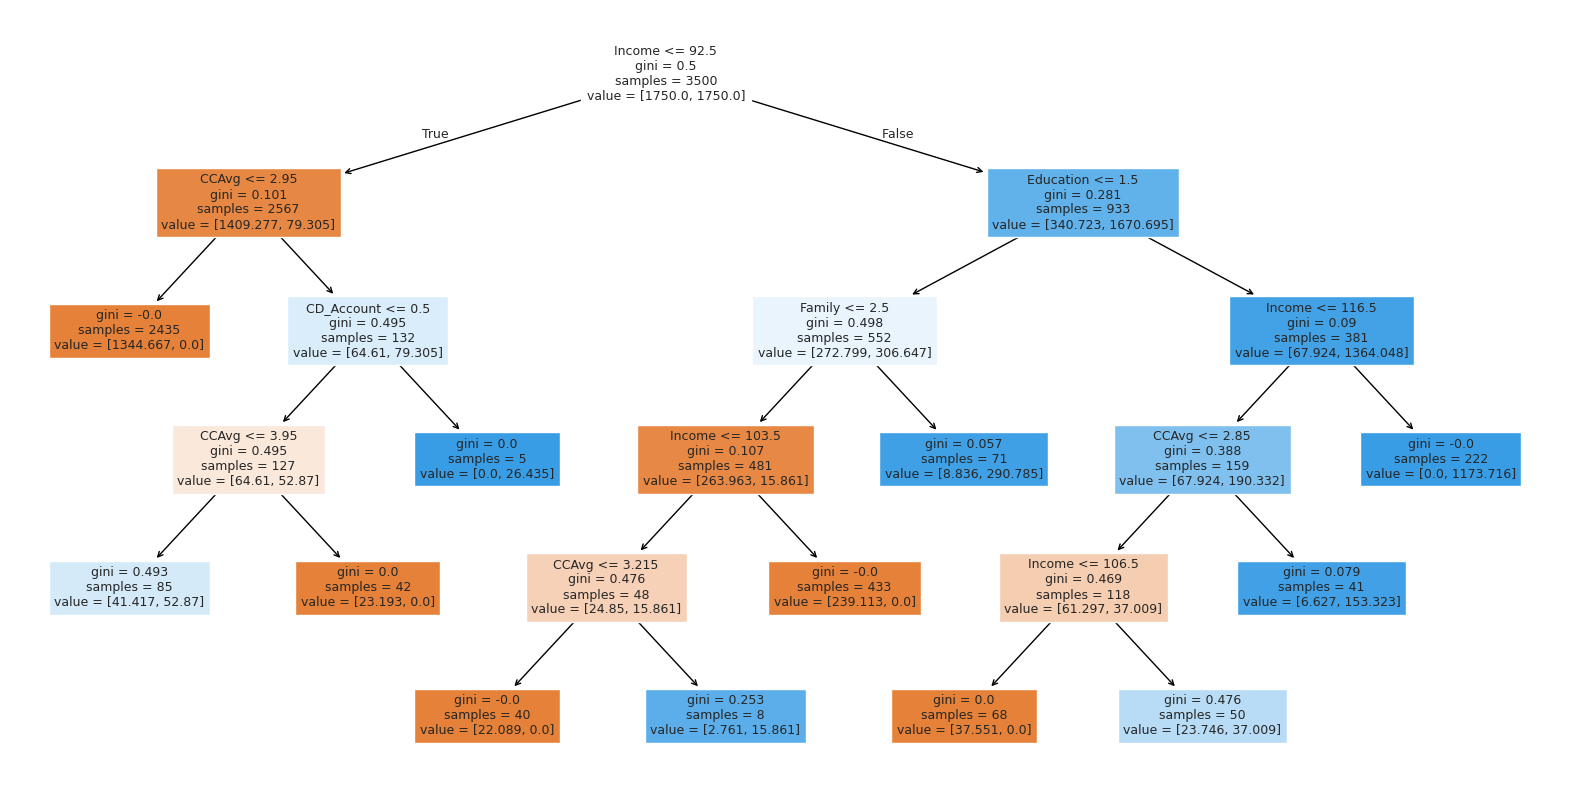

In [ ]:

# Visualize the best pruned Decision Tree
plt.figure(figsize=(20, 10))

# Plot the decision tree structure
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,   # Feature names
    filled=True,                   # Fill nodes with color
    fontsize=9,                    # Font size for text
    node_ids=False,                # Hide node IDs
    class_names=None               # Class labels (if applicable)
)

# Enhance arrow visibility for better clarity
for node in out:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")   # Black edges for arrows
        arrow.set_linewidth(1)         # Standard arrow width

# Display the decision tree
plt.show()


Observations from the Pruned Decision Tree

The decision tree highlights a few dominant drivers of personal loan acceptance:

1. Income is the most influential factor

The very first split is based on Income ≤ $92,500.


Customers
 earning
more than $92,500 are far more likely to accept personal loans.

This shows higher-income customers represent the bank’s top loan prospects.

2. Among low-income customers (≤ $92,500), credit card spending (CCAvg) drives the decision

If CCAvg ≤ $2,950, customers almost always reject the loan

If CCAvg > $2,950, some customers accept, especially when connected to CD accounts

It indicates spending behavior reveals financial need or openness to borrowing.

 3.CD Account ownership is a strong positive indicator

Low-income customers with a CD Account > 0.5 (i.e., they have one)
→ Very likely to accept a personal loan

These customers have an existing trusted banking relationship.

 Higher-income customers show different drivers

4.For income > $92,500:

Education ≤ 1.5 (less educated) and Family ≤ 2.5 differentiate acceptance patterns

Smaller family size and high income lead to higher acceptance probability

Higher-income individuals without heavy family responsibilities appear more open to loans.

 5.Very high-income and very high-spending customers almost always accept

Example:

Income > $116,500

CCAvg > $2,850
→ Strong likelihood of loan acceptance

These are prime target customers for cross-selling personal loans.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

In [ ]:
# Extract and sort feature importances from the best-performing model
importances = best_model.feature_importances_

# Sort feature indices in ascending order of importance
indices = np.argsort(importances)


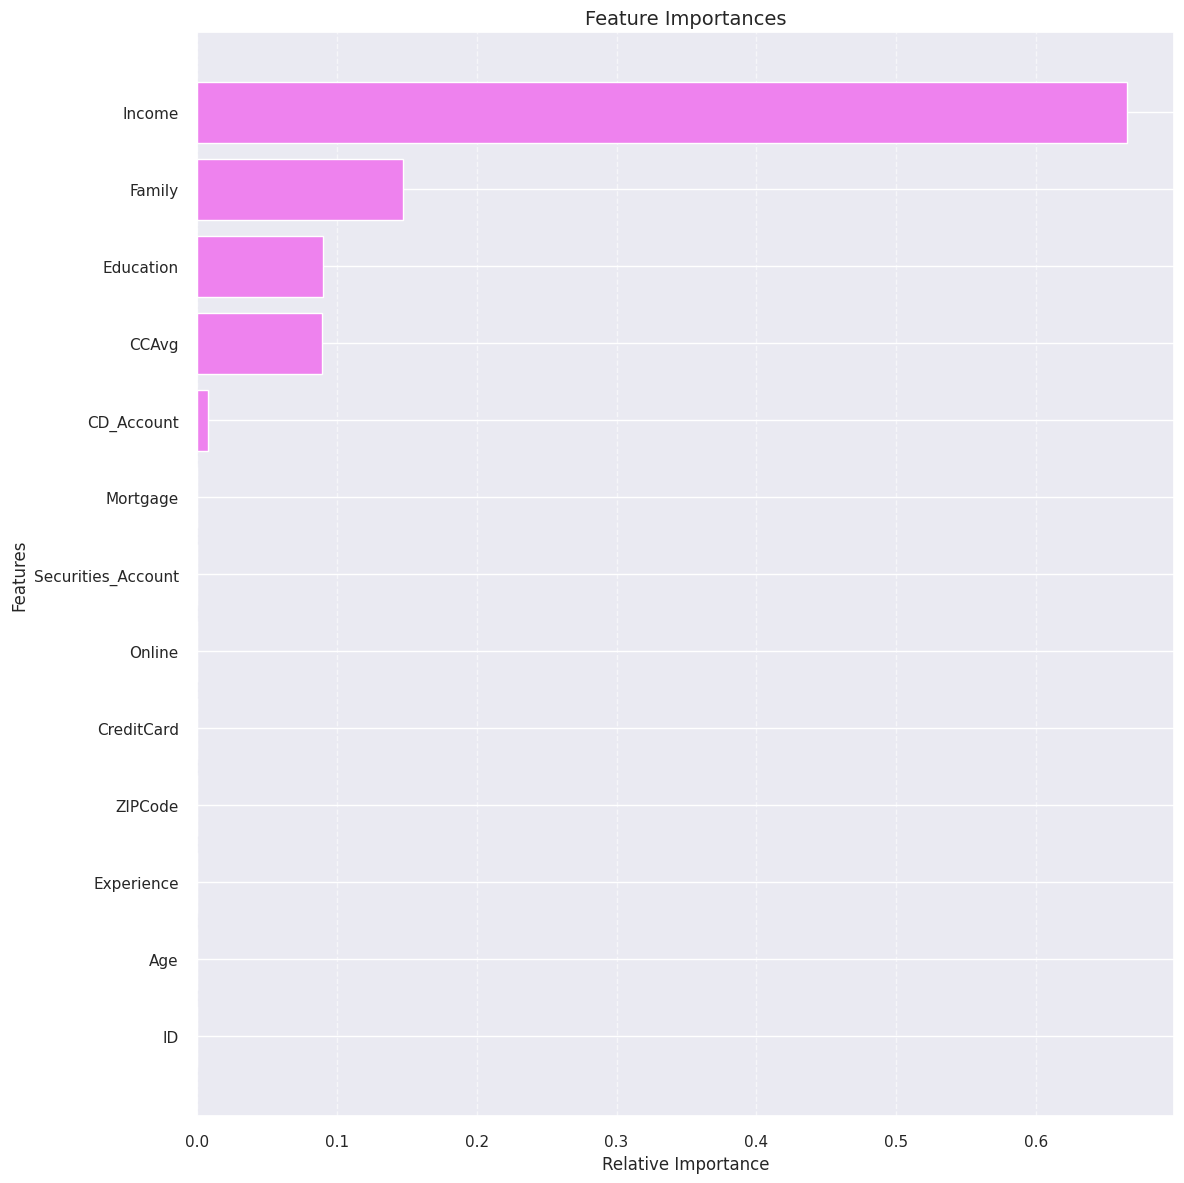

In [ ]:
# Plot the Feature Importances from the best model
plt.figure(figsize=(12, 12))
plt.title("Feature Importances", fontsize=14)

# Horizontal bar chart of feature importances
plt.barh(
    y=range(len(indices)),
    width=importances[indices],
    color="violet",
    align="center"
)

# Label the axes and features
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


The important observations are 'Income', 'Family', 'Education', 'CCAvg', and CD_Account' for the post-pruned decision tree

# **Model Comparison and Final Model Selection**

In [ ]:

# Compare training performance across different Decision Tree models
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1
)

# Assign column names for clarity
models_train_comp_df.columns = [
    "Decision Tree (No Class Weight)",
    "Decision Tree (With Class Weight)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)"
]

# Display the comparison results
print("Training Performance Comparison:\n")
models_train_comp_df


Training Performance Comparison:



,Decision Tree (No Class Weight),Decision Tree (With Class Weight),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


Detailed Insights

1.Overfitting in Unpruned Models (No Class Weight & With Class Weight):

Both models achieved perfect Accuracy (1.0), Precision (1.0), Recall (1.0), and F1-score (1.0) on training data.

This indicates that the models have learned the training data too perfectly, likely overfitting — meaning they may perform poorly on unseen (test) data.

2.Impact of Pre-Pruning:

The Pre-Pruned Decision Tree shows reduced Accuracy (0.79) and Precision (0.31) but maintains a Recall of 1.0.

This suggests that while the model identifies all positive cases (no false negatives), it also misclassifies many negatives as positives, leading to low precision.

In short, Pre-Pruning increased bias but reduced variance.

3.Impact of Post-Pruning:

The Post-Pruned Model achieves a balanced trade-off:

Accuracy: 0.9569 (High)

Precision: 0.6867 (Improved vs pre-pruning)

Recall: 1.0 (Excellent)

F1-score: 0.8143 (Good balance between precision and recall)

This indicates post-pruning effectively reduces overfitting while retaining strong predictive capability.

4.Overall Performance Comparison:

Pre-pruning: Simpler tree but too aggressive, losing precision.

Post-pruning: Achieves best generalization among all models.

No/With class weight: Overfits the training set completely.

In [ ]:
# Compare testing performance across different Decision Tree models
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1
)

# Assign column names for better readability
models_test_comp_df.columns = [
    "Decision Tree (No Class Weight)",
    "Decision Tree (With Class Weight)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)"
]

# Display the comparison results
print("Testing Performance Comparison:\n")
models_test_comp_df


Testing Performance Comparison:



,Decision Tree (No Class Weight),Decision Tree (With Class Weight),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.979333,0.779333,0.948667
Recall,0.906040,0.879195,1.000000,0.993289
Precision,0.900000,0.909722,0.310417,0.660714
F1,0.903010,0.894198,0.473768,0.793566


Detailed Insights

1.No Class Weight & With Class Weight Models

Both models show very high accuracy (~98%) and F1-scores (~0.90) on the test data, suggesting strong predictive power.

The difference between the two is minimal, indicating that class imbalance is not severely affecting model performance.

However, the near-perfect training results (from your previous table) indicate these are slightly overfitted — they generalize well but not perfectly.

2.Pre-Pruning Model

Recall = 1.0, meaning it identified all positive cases correctly.

However, Precision = 0.31, showing that many false positives were predicted.

Accuracy = 0.78 and F1 = 0.47, confirming the model is underfitted — it’s too simple and sacrifices precision for recall.

3.Post-Pruning Model

Accuracy = 0.95, Recall = 0.99, Precision = 0.66, and F1 = 0.79.

These values represent a balanced performance, reducing overfitting while retaining strong recall.

This model offers the best trade-off between bias and variance, making it more reliable for unseen data.

**# Actionable Insights and Business Recommendations**


What recommedations would you suggest to the bank?

Model Performance Summary

Both the pre-pruned and post-pruned decision tree models deliver similarly strong recall scores on the training and test datasets.
This indicates that both models are effective in correctly identifying potential personal loan customers.

However, the post-pruned model is selected as the final model because it achieves higher precision on both datasets.
This means it makes fewer false positive predictions and provides more reliable identification of customers likely to accept a personal loan.

Insights and Recommendations Based on the Post-Pruned Decision Tree Model
A. Income and Credit Card Spending (CCAvg):

1.Customers with annual income ≤ $92,500

are unlikely to accept a personal loan if their average monthly credit card spending (CCAvg) ≤ $2,950.

2.Within this same income group:

If CCAvg > $2,950

and the customer does not have a Certificate of Deposit (CD) account), they are likely to accept a personal loan if CCAvg ≤ $3,950.

Customers with a CD account in this income range are highly likely to accept a personal loan, regardless of spending level.

Key Insight:
Holding a CD account is a strong indicator of loan acceptance among lower-income customers.

B.Education and Family Size

For customers with income > $92,500:

1.Those with an undergraduate education (Education ≤ 1.5) and small families (Family ≤ 2.5) are less likely to take a personal loan, particularly if their income is ≤ $103,500.

2.Customers with a graduate or professional degree (Education > 1.5) are more likely to accept a personal loan when
income ≤ $116,500

and
CCAvg > $2,850.


Key Insight:
Higher education levels and moderate-to-high credit card spending are key drivers of personal loan acceptance among higher-income customers.


C.Segmentation and Marketing Recommendations:

1.Target High-Value Segments:
Focus on customers earning above $92,500, especially those with graduate or professional degrees, as they represent the most promising segment for personal loan acquisition.

2.Use Behavioral Indicators:
Incorporate credit card spending (CCAvg) and CD account ownership as key segmentation variables to prioritize high-potential customers.

3.Tailored Marketing Campaigns:
Develop personalized outreach to educate and incentivize customers — highlight personal loan benefits, offer attractive interest rates, and design promotions that appeal to financially active and credit-savvy individuals.
